<div style="background-color: #0f0f23; color: #00ff41; font-family: 'Courier New', monospace; padding: 20px; border-radius: 10px; border: 2px solid #00ff41; box-shadow: 0 0 10px #00ff41;">
    <h1 style="text-align: center;">Introduction</h1>
    <p style='font-size:30px'>In this project, we will conduct a comprehensive exploratory data analysis followed by clustering using the K-means algorithm. The primary goal of this project is to gain insights into customers' behaviors, demographics, and to identify patterns and similarities among different customer segments.</p>
    <p style='font-size:30px'>By understanding the distinct characteristics of each customer group, businesses can tailor their marketing strategies to meet the specific needs and preferences of each segment, ultimately enhancing customer satisfaction and driving business growth. This analysis will provide valuable insights that can help the company make informed decisions and optimize its marketing efforts.</p>
</div>


In [348]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [349]:
#show all the column of the df
pd.set_option('display.max_columns', None)

In [350]:
df = pd.read_csv('dataset/marketing_campaign.csv')

## Dataset Description

The dataset contains the following attributes:

### People

- **ID**: Customer's unique identifier
- **Year_Birth**: Customer's birth year
- **Education**: Customer's education level
- **Marital_Status**: Customer's marital status
- **Income**: Customer's yearly household income
- **Kidhome**: Number of children in customer's household
- **Teenhome**: Number of teenagers in customer's household
- **Dt_Customer**: Date of customer's enrollment with the company
- **Recency**: Number of days since customer's last purchase
- **Complain**: 1 if the customer complained in the last 2 years, 0 otherwise

### Products

- **MntWines**: Amount spent on wine in last 2 years
- **MntFruits**: Amount spent on fruits in last 2 years
- **MntMeatProducts**: Amount spent on meat in last 2 years
- **MntFishProducts**: Amount spent on fish in last 2 years
- **MntSweetProducts**: Amount spent on sweets in last 2 years
- **MntGoldProds**: Amount spent on gold in last 2 years

### Promotion

- **NumDealsPurchases**: Number of purchases made with a discount
- **AcceptedCmp1**: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- **AcceptedCmp2**: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- **AcceptedCmp3**: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- **AcceptedCmp4**: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- **AcceptedCmp5**: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- **Response**: 1 if customer accepted the offer in the last campaign, 0 otherwise

### Place

- **NumWebPurchases**: Number of purchases made through the company’s website
- **NumCatalogPurchases**: Number of purchases made using a catalogue
- **NumStorePurchases**: Number of purchases made directly in stores
- **NumWebVisitsMonth**: Number of visits to company’s website in the last month

In [351]:
#df['ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse'].iloc[0]
#create a new column with name from the column names that are separated by \t
columns = df.columns[0].split('\t')
#loop through the columns string names
column_number = 0
for column in columns:
    #create a new column with the current name of the string
    row_values = []
    for i in range(len(df)):
        row_values.append(df['ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse'].iloc[i].split('\t')[column_number])
    column_number += 1
    df[column] = row_values
    #fill the new column with the values from the main column that are separated by \t but with the value that belong to it
#drop the main column
df.drop(columns=['ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse'], inplace=True)

In [352]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [353]:
#check for null values
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [354]:
#check for duplicates
df.duplicated().sum()

0

In [355]:
#drop Z_CostContact and Z_Revenue columns
df.drop(columns=['Z_CostContact', 'Z_Revenue'], inplace=True)


In [356]:
df['Income'] = df['Income'].replace('', np.nan)  # replace empty strings with NaN
df['Income'] = df['Income'].fillna(0)  # fill NaN values with 0

In [357]:
# List of columns to convert to 'int64'
int_cols = ['Year_Birth', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 
            'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
            'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
            'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 
            'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 
            'Response','Income']

# Convert columns to 'int64'
for col in int_cols:
    df[col] = df[col].astype('int64')

# Convert 'Dt_Customer' to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

# List of columns to convert to 'string'
str_cols = ['Education', 'Marital_Status']

# Convert columns to 'string'
for col in str_cols:
    df[col] = df[col].astype('string')

In [358]:
#drop id column
df.drop(columns=['ID'], inplace=True)
#drop complain column
df['Complain'].value_counts()
df.drop(columns=['Complain'], inplace=True)
#drop recency column
df.drop(columns=['Recency'], inplace=True)


Very few customers have complained,This is a class imbalance problem  
most customers are active in the past 2 years so recency has less importance

In [359]:
#feature with the age of the customer
latest_date = df['Dt_Customer'].max()
df['Age'] = latest_date.year - df['Year_Birth']
#drop the Year_Birth column
df.drop(columns=['Year_Birth'], inplace=True)
df.drop(columns=['Dt_Customer'], inplace=True)

In [360]:
#feature with the total spending of the customer
df['Total_spending'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [361]:
#featue with the total number of childeren in the household
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

In [362]:
#feature with the total number of purchases
df['Total_Purchases'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

In [363]:
#feature with the total number of accepted campaigns divided by the total number of campaigns mulitplied by 100
df['Total_Accepted_Campaigns'] = (df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['AcceptedCmp1'] + df['AcceptedCmp2']+ df['Response'])

In [364]:
# organize the columns
# Define the new order of the columns
column_order = [ 'Age', 'Education', 'Marital_Status', 'Income', 
                'Kidhome', 'Teenhome', 'Total_Children', 
                'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                'MntSweetProducts', 'MntGoldProds', 'Total_spending', 
                'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
                'NumStorePurchases', 'Total_Purchases', 'NumWebVisitsMonth', 
                'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 
                'AcceptedCmp5', 'Response', 'Total_Accepted_Campaigns']

# Reorder the columns
df = df[column_order]

In [365]:
#renaming the columns to make them more readable
df.rename(columns={
    'Kidhome': 'NumberOfKidsAtHome',
    'Teenhome': 'NumberOfTeensAtHome',
    'Total_Children': 'TotalNumberOfChildren',
    'Days_Since_Joined': 'DaysSinceEnrollment',
    'MntWines': 'AmountSpentOnWines',
    'MntFruits': 'AmountSpentOnFruits',
    'MntMeatProducts': 'AmountSpentOnMeat',
    'MntFishProducts': 'AmountSpentOnFish',
    'MntSweetProducts': 'AmountSpentOnSweets',
    'MntGoldProds': 'AmountSpentOnGold',
    'Total_spending': 'TotalSpending',
    'NumDealsPurchases': 'NumberOfDealsPurchases',
    'NumWebPurchases': 'NumberOfWebPurchases',
    'NumCatalogPurchases': 'NumberOfCatalogPurchases',
    'NumStorePurchases': 'NumberOfStorePurchases',
    'Total_Purchases': 'TotalNumberOfPurchases',
    'NumWebVisitsMonth': 'NumberOfWebVisitsPerMonth',
    'AcceptedCmp1': 'AcceptedCampaign1',
    'AcceptedCmp2': 'AcceptedCampaign2',
    'AcceptedCmp3': 'AcceptedCampaign3',
    'AcceptedCmp4': 'AcceptedCampaign4',
    'AcceptedCmp5': 'AcceptedCampaign5',
    'Response': 'AcceptedLastCampaign',
    'Total_Accepted_Campaigns': 'TotalAcceptedCampaigns',
}, inplace=True)

In [366]:
#descriptive statistics for age 
df['Age'].describe()

count    2240.000000
mean       45.194196
std        11.984069
min        18.000000
25%        37.000000
50%        44.000000
75%        55.000000
max       121.000000
Name: Age, dtype: float64

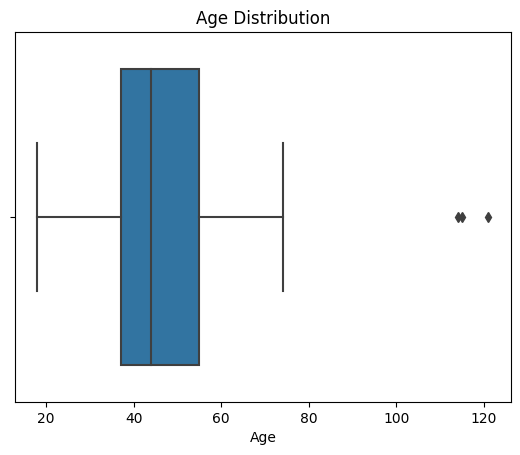

In [367]:
sns.boxplot(x='Age', data=df)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

<AxesSubplot: xlabel='Age'>

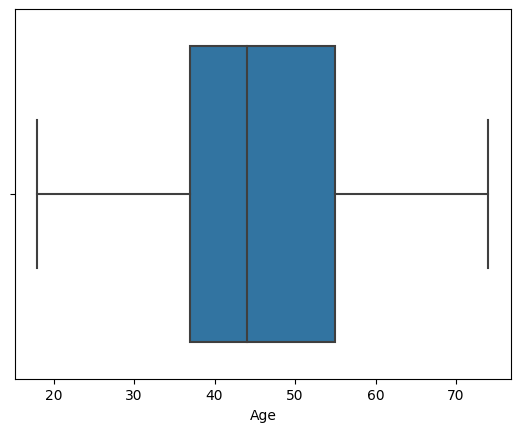

In [368]:
# Keep only the rows where 'Age' is less than or equal to 80
df = df[df['Age'] <= 80]
# Check the outliers of the 'Age' feature
sns.boxplot(x=df['Age'])

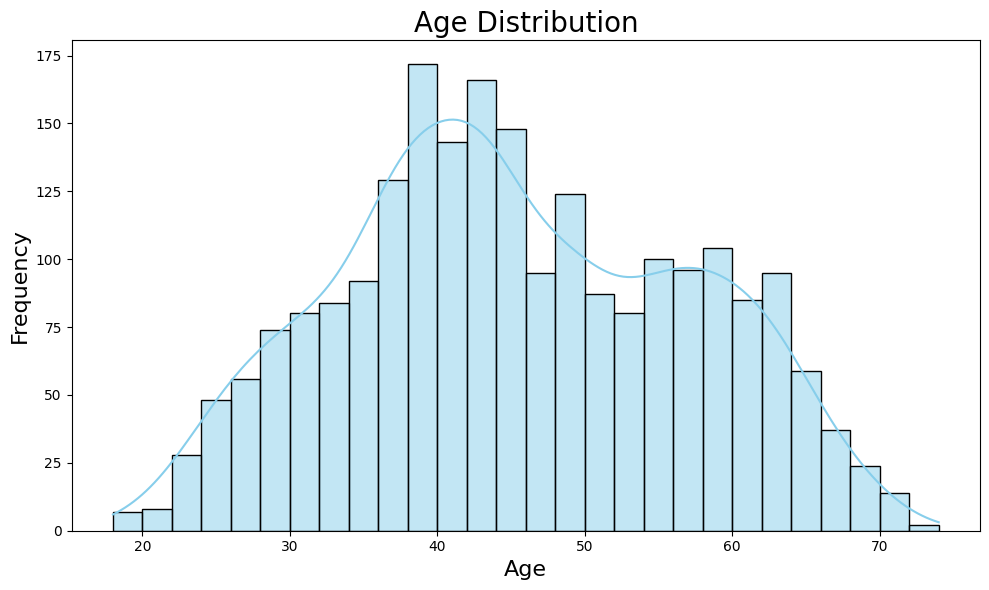

In [369]:
plt.figure(figsize=(10, 6))
hist_plot = sns.histplot(df['Age'], bins=30, kde=True, color="skyblue",binwidth=2)
hist_plot.set_title('Age Distribution', fontsize=20)
hist_plot.set_xlabel('Age', fontsize=16)
hist_plot.set_ylabel('Frequency', fontsize=16)
plt.tight_layout()
plt.show()

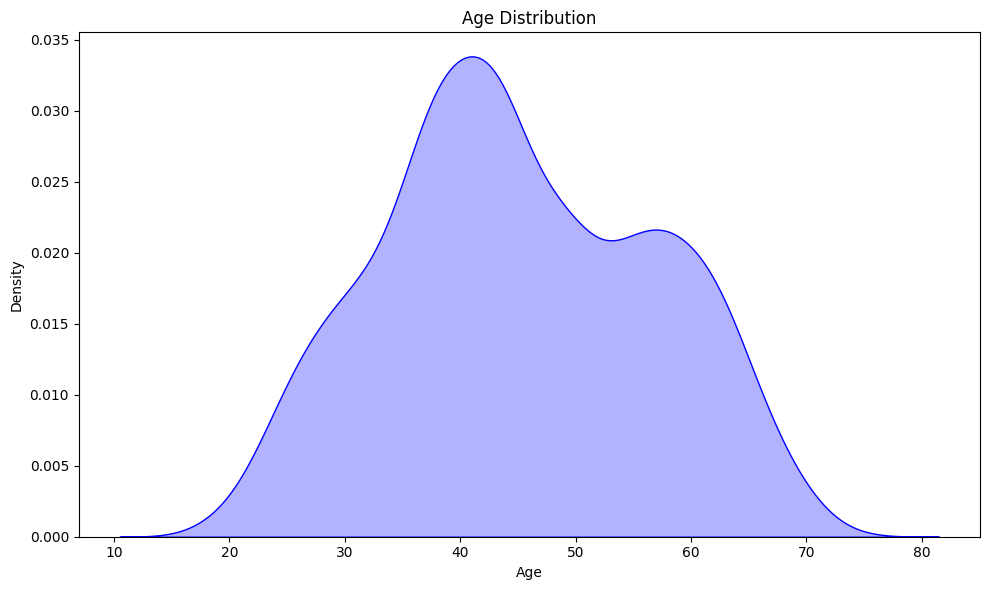

In [370]:
#density plots for age
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Age'], fill=True, color='blue', alpha=0.3)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

Outliers detected and removed  
The distribution is higher between 35 and 50 years old  
The distribution is slightly right skewed  

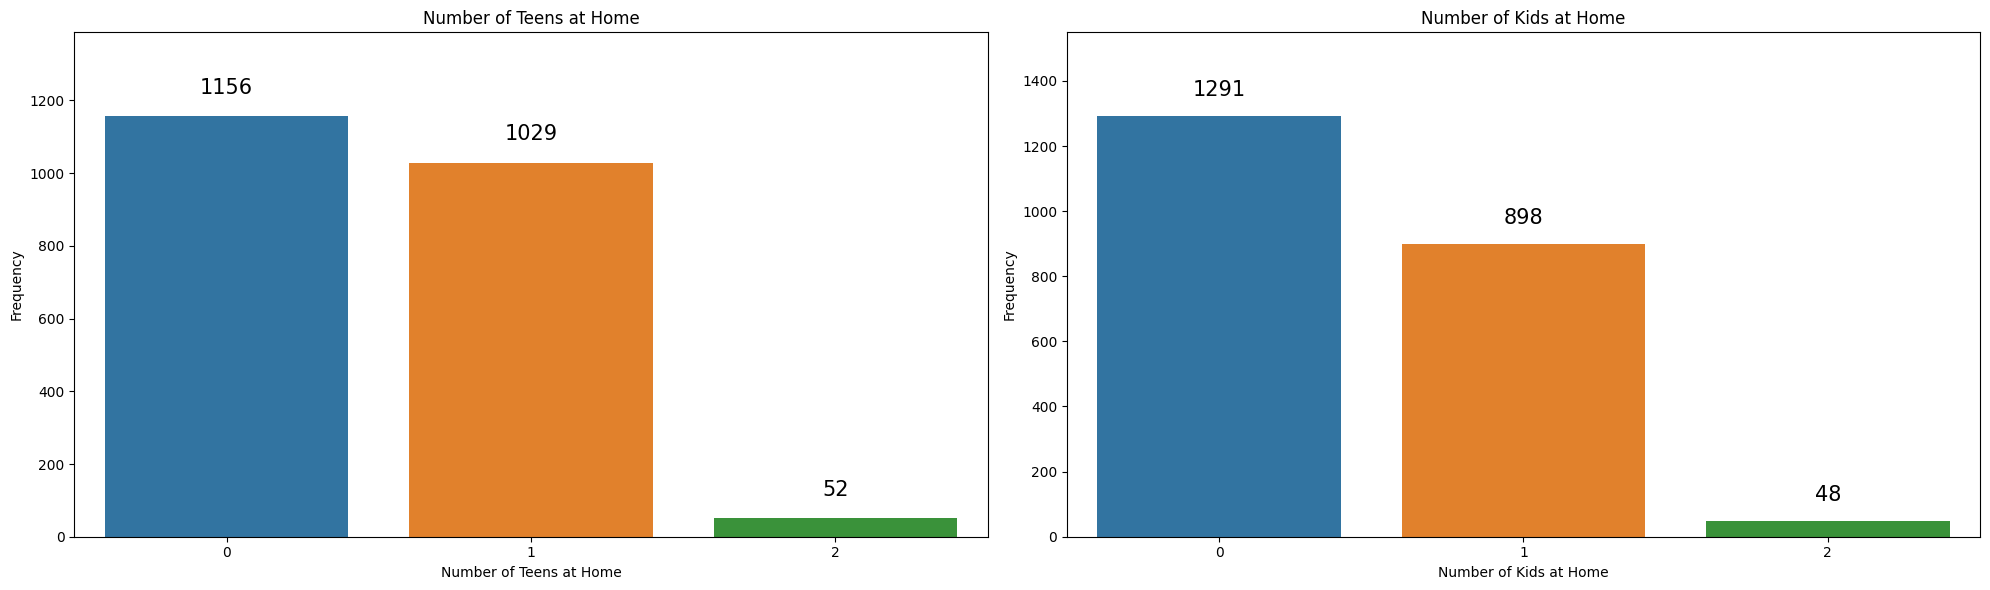

In [371]:
import matplotlib.pyplot as plt
import seaborn as sns
# Assuming 'df' is your DataFrame

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))  # 1 row, 2 columns

# Plot for number of teens at home
sns.countplot(x='NumberOfTeensAtHome', data=df, ax=axes[0])
for p in axes[0].patches:
    axes[0].text(p.get_x() + p.get_width() / 2., p.get_height() + 50, '%d' % int(p.get_height()),
                 ha='center', va='bottom', fontsize=15, color='black')
axes[0].set_title('Number of Teens at Home')
axes[0].set_xlabel('Number of Teens at Home')
axes[0].set_ylabel('Frequency')
# Adjust the upper padding to make room for the text
max_height = max([p.get_height() for p in axes[0].patches])
axes[0].set_ylim(0, max_height * 1.2)

# Plot for number of kids at home
sns.countplot(x='NumberOfKidsAtHome', data=df, ax=axes[1])
for p in axes[1].patches:
    axes[1].text(p.get_x() + p.get_width() / 2., p.get_height() + 50, '%d' % int(p.get_height()),
                 ha='center', va='bottom', fontsize=15, color='black')
axes[1].set_title('Number of Kids at Home')
axes[1].set_xlabel('Number of Kids at Home')
axes[1].set_ylabel('Frequency')
# Adjust the upper padding to make room for the text
max_height = max([p.get_height() for p in axes[1].patches])
axes[1].set_ylim(0, max_height * 1.2)

plt.tight_layout()
plt.show()


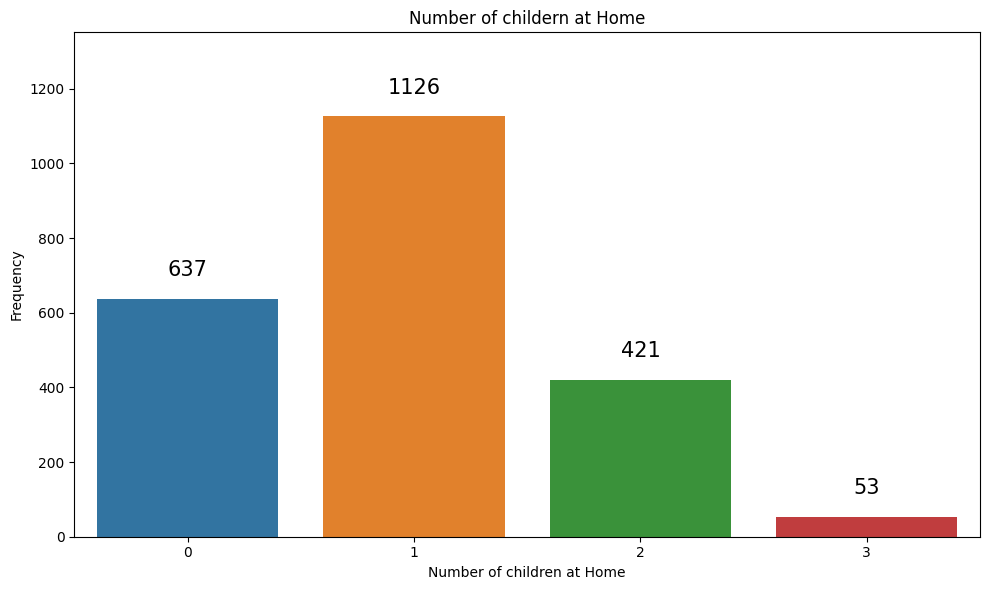

In [372]:
plt.figure(figsize=(10, 6))    
sns.countplot(x='TotalNumberOfChildren', data=df)

for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2., p.get_height()+50, '%d' % int(p.get_height()), 
             ha='center', va='bottom', fontsize=15, color='black')

plt.title('Number of childern at Home')
plt.xlabel('Number of children at Home')
plt.ylabel('Frequency')
plt.tight_layout()

#adjust upper padding to make room for the text
max_height = max([p.get_height() for p in plt.gca().patches])
plt.ylim(0, max_height * 1.2)
plt.show()

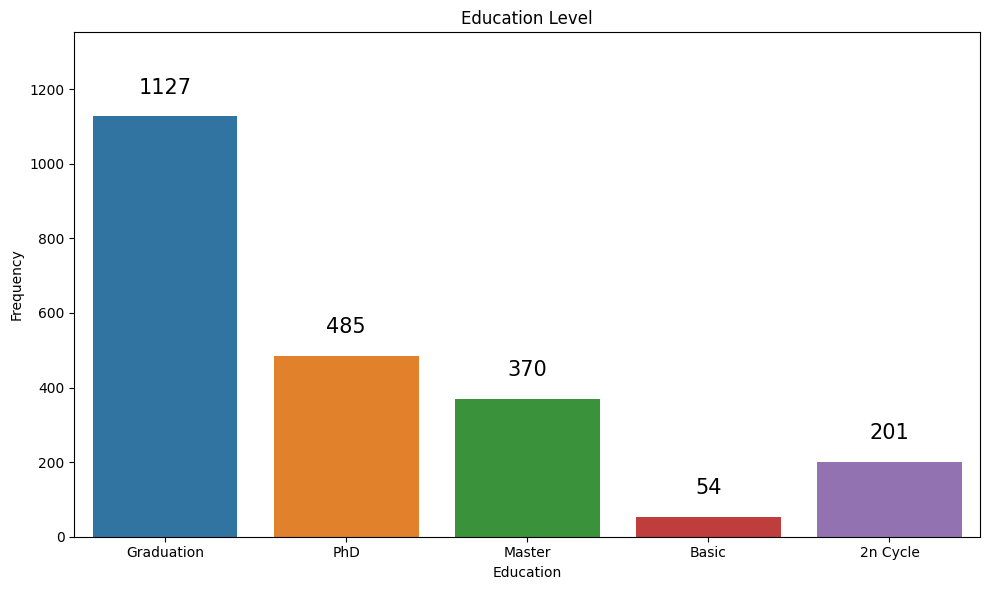

In [373]:
plt.figure(figsize=(10, 6))    
sns.countplot(x='Education', data=df)

for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2., p.get_height()+50, '%d' % int(p.get_height()), 
             ha='center', va='bottom', fontsize=15, color='black')

plt.title('Education Level')
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.tight_layout()

#adjust upper padding to make room for the text
max_height = max([p.get_height() for p in plt.gca().patches])
plt.ylim(0, max_height * 1.2)
plt.show()

#for us to group the education level into less categories requires farther analysis later in the multivariate analysis phase

In [374]:
df['Marital_Status'].value_counts()

Married     864
Together    579
Single      479
Divorced    231
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: Int64

In [375]:
#grouping the martials status into less categories one called in relationship and the othe single
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'], 'In relationship')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone','Single','Absurd','YOLO'], 'Single')

Most of the customers have higher education

In [376]:
df['Income'].describe()

count      2237.000000
mean      51676.153330
std       25615.057625
min           0.000000
25%       34704.000000
50%       51039.000000
75%       68281.000000
max      666666.000000
Name: Income, dtype: float64

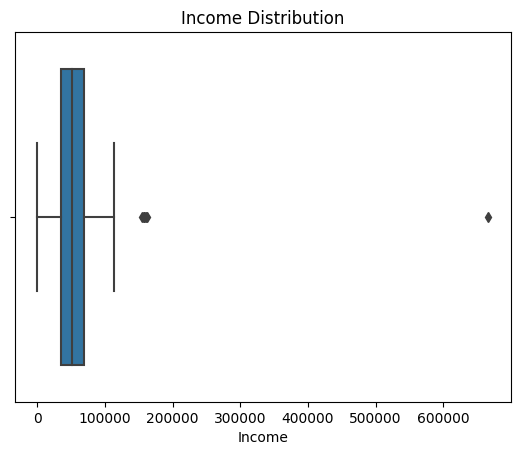

In [377]:
sns.boxplot(x='Income', data=df)
plt.title('Income Distribution')
plt.xlabel('Income')   
plt.show()

In [378]:
def remove_outliers(df, col, multiplier=1.5):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (multiplier * IQR)
    upper_bound = Q3 + (multiplier * IQR)
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [379]:
df = remove_outliers(df, 'Income')

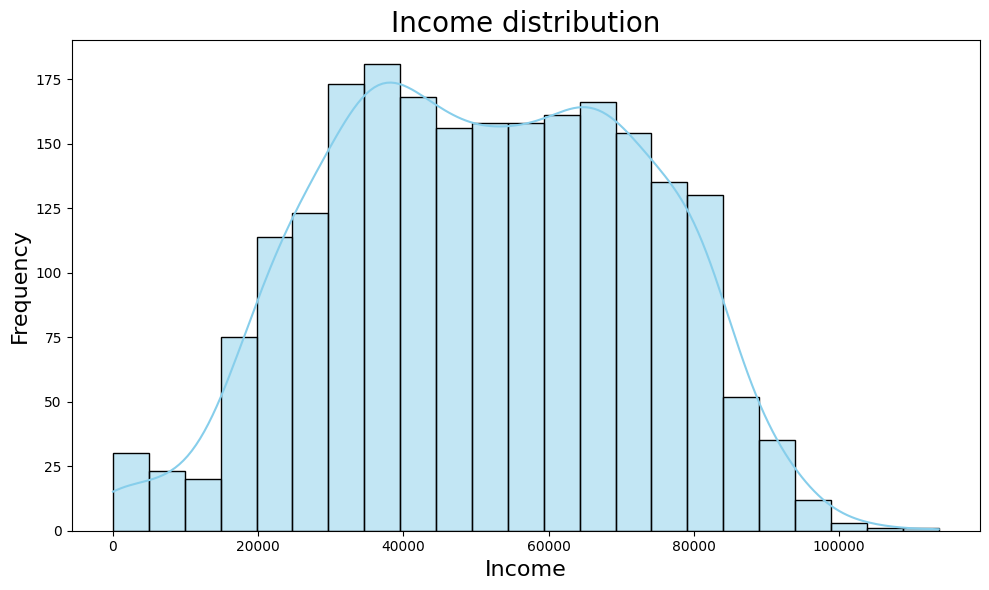

In [380]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Income'], kde=True, color="skyblue")
plt.title('Income distribution', fontsize=20)
plt.xlabel('Income', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.tight_layout()
plt.show()

there is no clear pattern in the income distribution

In [381]:
spending_cols = ['AmountSpentOnWines', 'AmountSpentOnFruits', 'AmountSpentOnMeat', 
                 'AmountSpentOnFish', 'AmountSpentOnSweets', 'AmountSpentOnGold']
df[spending_cols].describe()

,AmountSpentOnWines,AmountSpentOnFruits,AmountSpentOnMeat,AmountSpentOnFish,AmountSpentOnSweets,AmountSpentOnGold
count,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000
mean,304.991476,26.348587,165.283984,37.642441,27.161507,44.113055
std,336.761943,39.764060,219.336589,54.700548,41.338945,52.091255
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000
50%,176.000000,8.000000,67.000000,12.000000,8.000000,24.000000
75%,505.000000,33.000000,231.000000,50.000000,34.000000,56.000000
max,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000


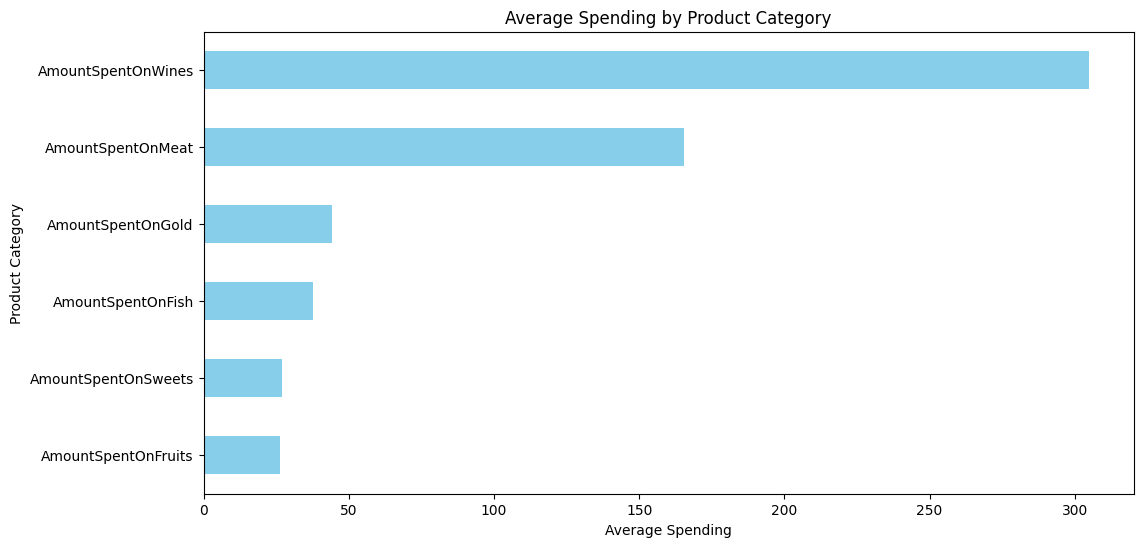

In [382]:
# Calculating total and average spending in each product category
average_spending_by_category = df[spending_cols].mean()


# Visualizing total spending in each product category
plt.figure(figsize=(12, 6))
average_spending_by_category.sort_values().plot(kind='barh', color='skyblue')
plt.title('Average Spending by Product Category')
plt.xlabel('Average Spending')
plt.ylabel('Product Category')
plt.show()


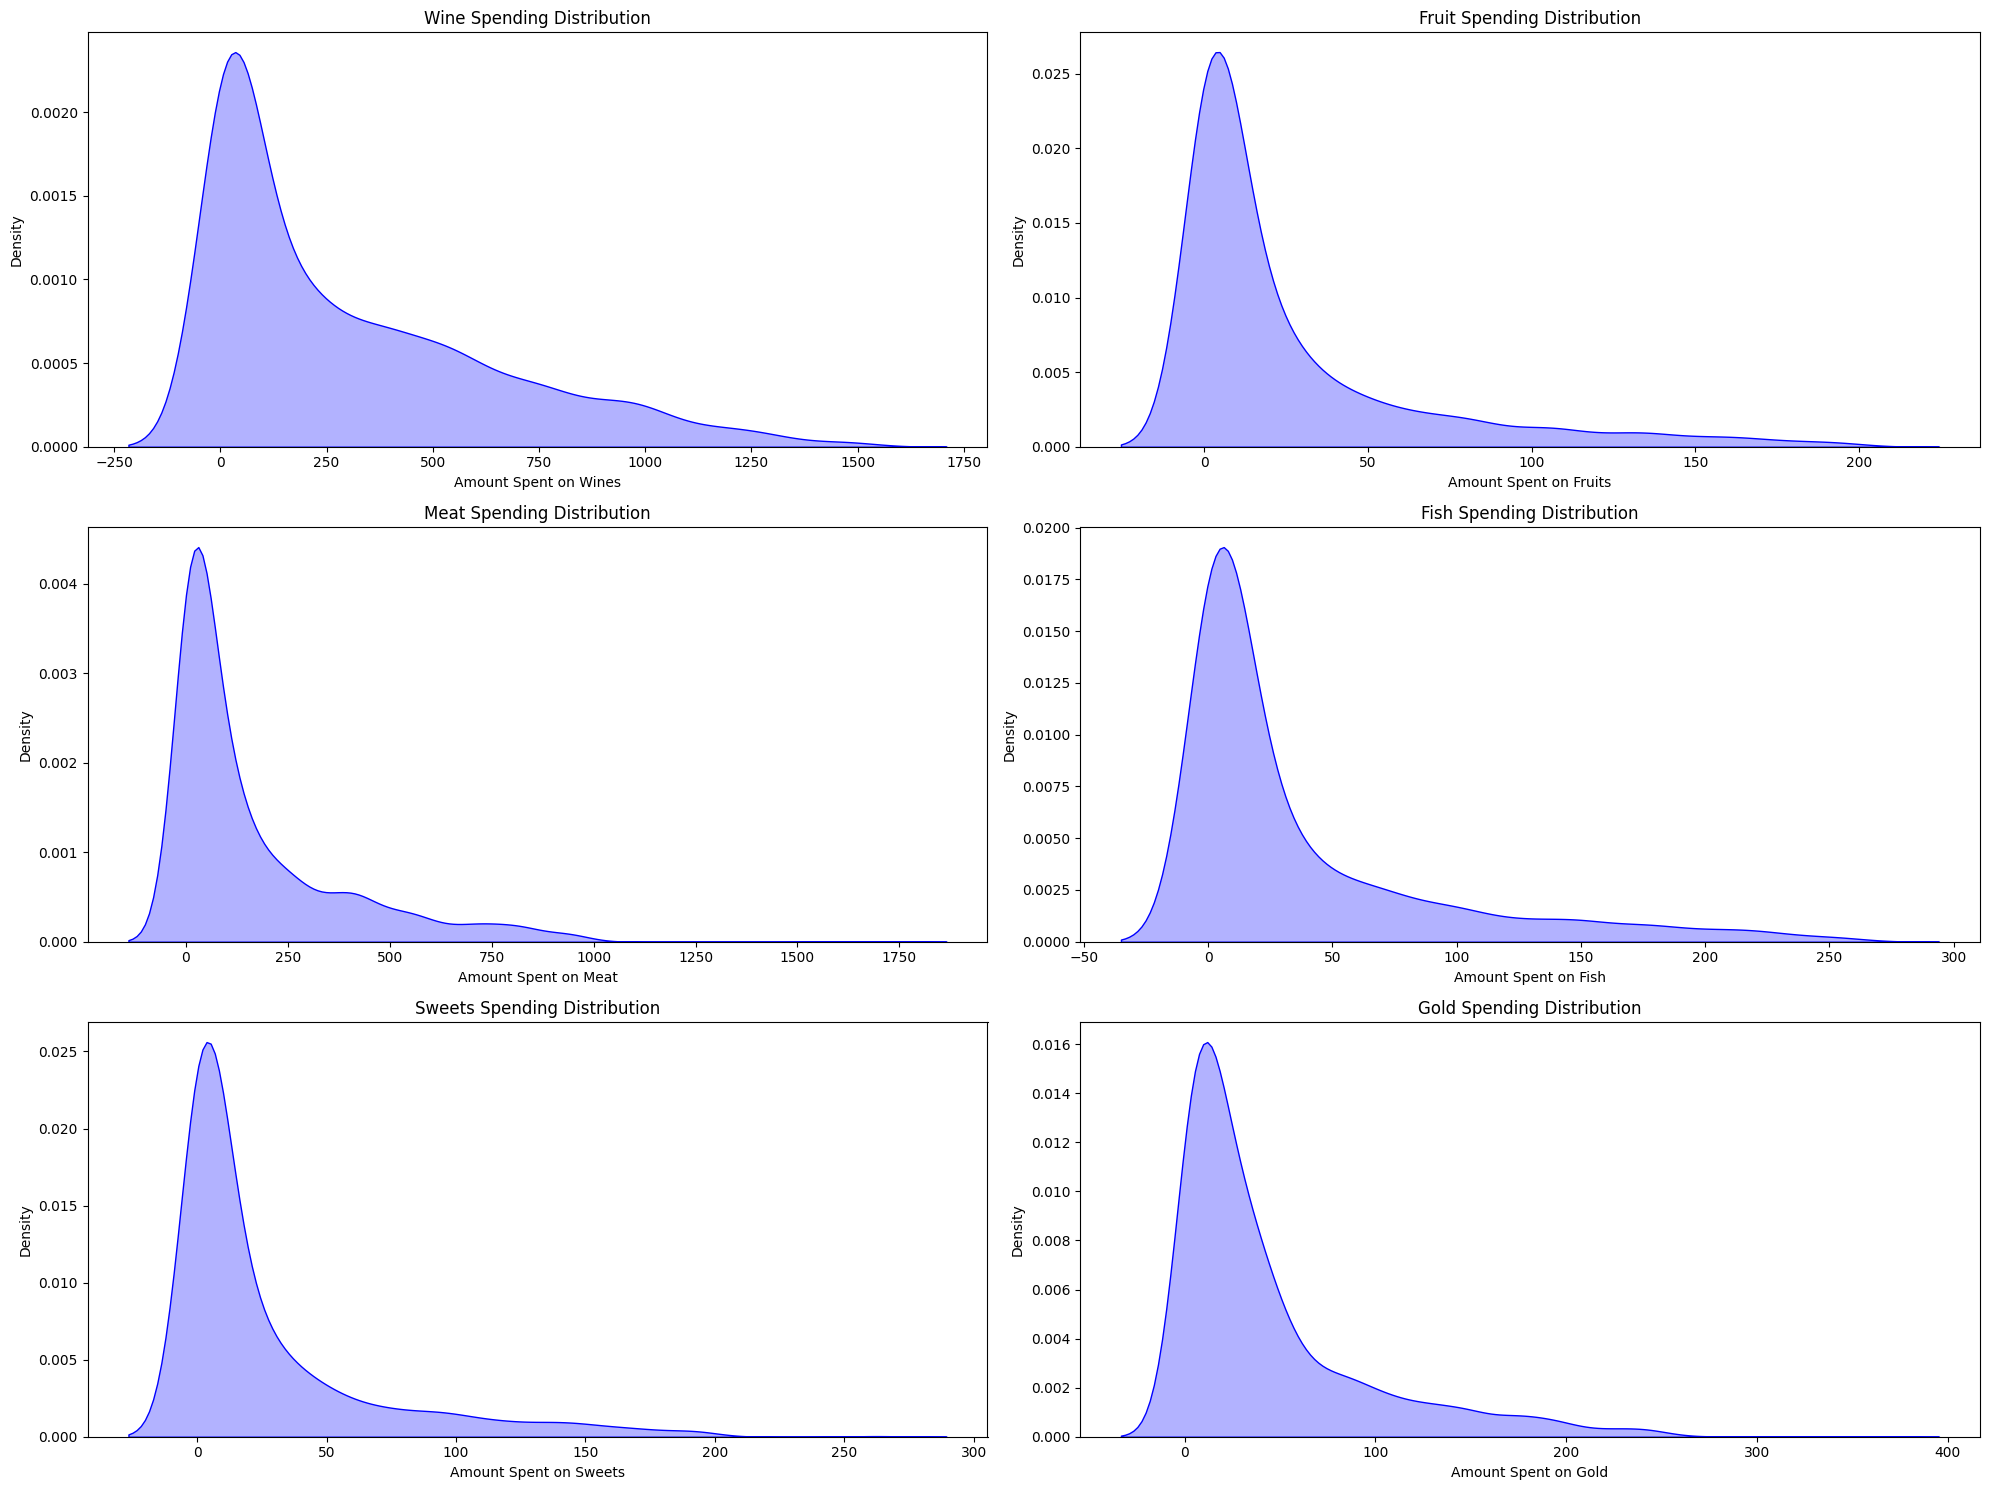

In [383]:
#density plot for all spending catogeries each catogery plotted on a graph but shown togethre 2 each row 

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))  # 3 rows, 2 columns

# Plot for amount spent on wines

sns.kdeplot(df['AmountSpentOnWines'], fill=True, color='blue', alpha=0.3, ax=axes[0, 0])
axes[0, 0].set_title('Wine Spending Distribution')
axes[0, 0].set_xlabel('Amount Spent on Wines')
axes[0, 0].set_ylabel('Density')

# Plot for amount spent on fruits
sns.kdeplot(df['AmountSpentOnFruits'], fill=True, color='blue', alpha=0.3, ax=axes[0, 1])
axes[0, 1].set_title('Fruit Spending Distribution')
axes[0, 1].set_xlabel('Amount Spent on Fruits')
axes[0, 1].set_ylabel('Density')

# Plot for amount spent on meat
sns.kdeplot(df['AmountSpentOnMeat'], fill=True, color='blue', alpha=0.3, ax=axes[1, 0])
axes[1, 0].set_title('Meat Spending Distribution')
axes[1, 0].set_xlabel('Amount Spent on Meat')
axes[1, 0].set_ylabel('Density')

# Plot for amount spent on fish

sns.kdeplot(df['AmountSpentOnFish'], fill=True, color='blue', alpha=0.3, ax=axes[1, 1])
axes[1, 1].set_title('Fish Spending Distribution')
axes[1, 1].set_xlabel('Amount Spent on Fish')
axes[1, 1].set_ylabel('Density')

# Plot for amount spent on sweets
sns.kdeplot(df['AmountSpentOnSweets'], fill=True, color='blue', alpha=0.3, ax=axes[2, 0])
axes[2, 0].set_title('Sweets Spending Distribution')
axes[2, 0].set_xlabel('Amount Spent on Sweets')
axes[2, 0].set_ylabel('Density')

# Plot for amount spent on gold
sns.kdeplot(df['AmountSpentOnGold'], fill=True, color='blue', alpha=0.3, ax=axes[2, 1])
axes[2, 1].set_title('Gold Spending Distribution')
axes[2, 1].set_xlabel('Amount Spent on Gold')
axes[2, 1].set_ylabel('Density')

plt.tight_layout()
plt.show()



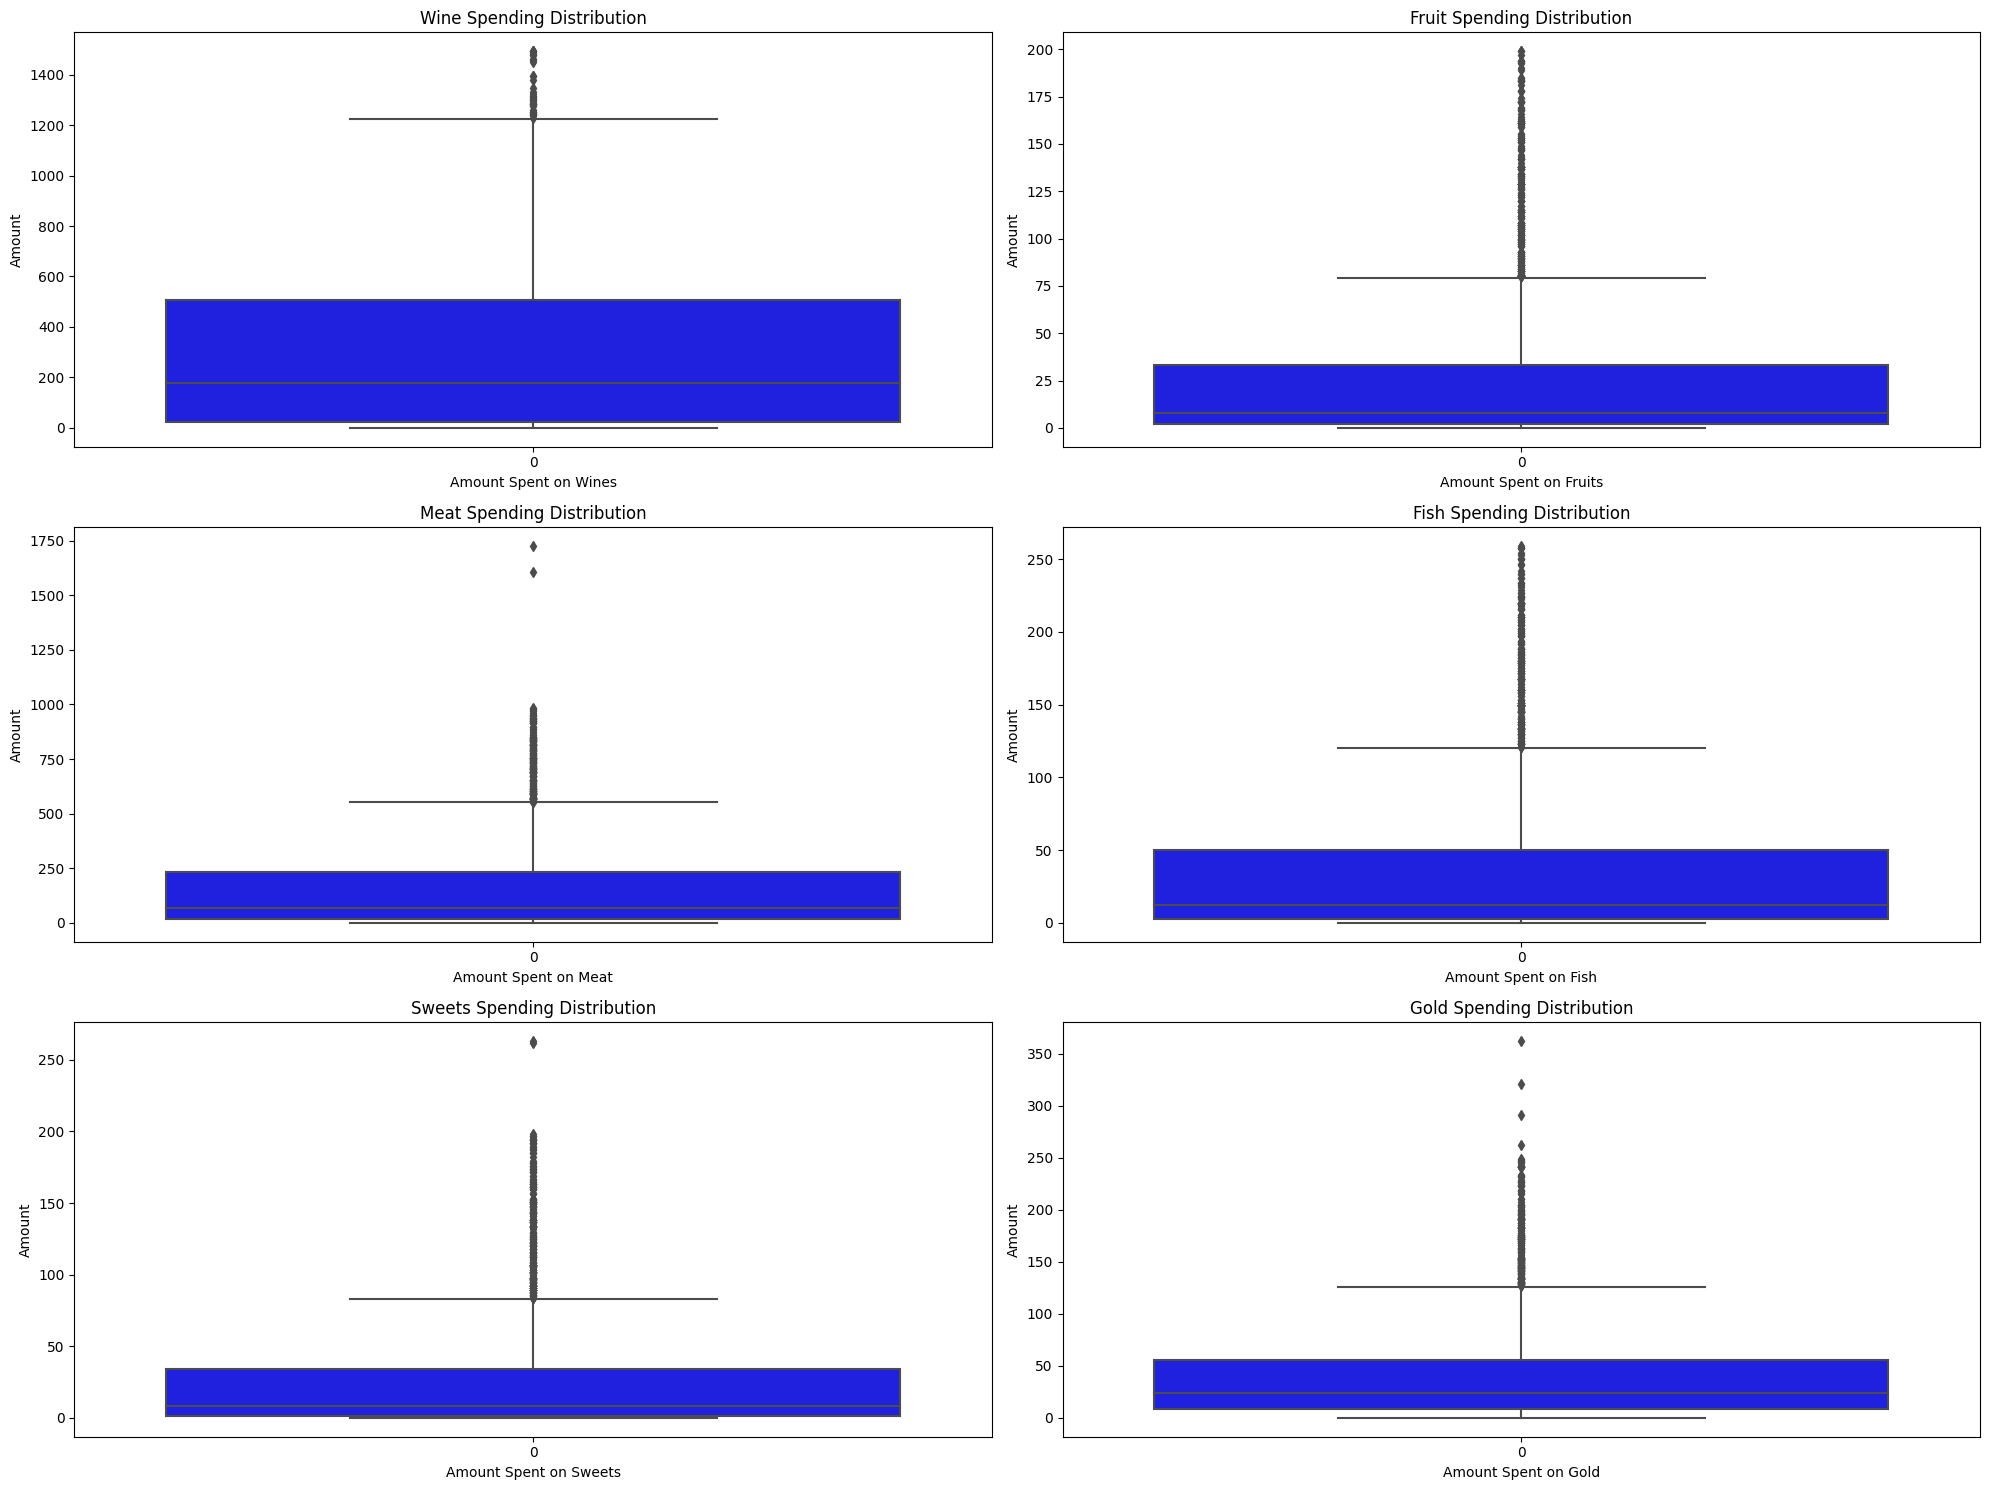

In [384]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))  # 3 rows, 2 columns

# Box plot for amount spent on wines
sns.boxplot(df['AmountSpentOnWines'], color='blue', ax=axes[0, 0])
axes[0, 0].set_title('Wine Spending Distribution')
axes[0, 0].set_xlabel('Amount Spent on Wines')
axes[0, 0].set_ylabel('Amount')

# Box plot for amount spent on fruits
sns.boxplot(df['AmountSpentOnFruits'], color='blue', ax=axes[0, 1])
axes[0, 1].set_title('Fruit Spending Distribution')
axes[0, 1].set_xlabel('Amount Spent on Fruits')
axes[0, 1].set_ylabel('Amount')

# Box plot for amount spent on meat
sns.boxplot(df['AmountSpentOnMeat'], color='blue', ax=axes[1, 0])
axes[1, 0].set_title('Meat Spending Distribution')
axes[1, 0].set_xlabel('Amount Spent on Meat')
axes[1, 0].set_ylabel('Amount')

# Box plot for amount spent on fish
sns.boxplot(df['AmountSpentOnFish'], color='blue', ax=axes[1, 1])
axes[1, 1].set_title('Fish Spending Distribution')
axes[1, 1].set_xlabel('Amount Spent on Fish')
axes[1, 1].set_ylabel('Amount')

# Box plot for amount spent on sweets
sns.boxplot(df['AmountSpentOnSweets'], color='blue', ax=axes[2, 0])
axes[2, 0].set_title('Sweets Spending Distribution')
axes[2, 0].set_xlabel('Amount Spent on Sweets')
axes[2, 0].set_ylabel('Amount')

# Box plot for amount spent on gold
sns.boxplot(df['AmountSpentOnGold'], color='blue', ax=axes[2, 1])
axes[2, 1].set_title('Gold Spending Distribution')
axes[2, 1].set_xlabel('Amount Spent on Gold')
axes[2, 1].set_ylabel('Amount')

plt.tight_layout()
plt.show()

In [385]:
df=remove_outliers(df, 'AmountSpentOnMeat', multiplier=3)
df=remove_outliers(df, 'AmountSpentOnSweets', multiplier=3)

"The dataset shows varied spending across categories with some outliers. We kept most outliers to maintain data integrity, removing only the most extreme cases in meat and sweets to improve clustering results."

Meat and Wine are the have considerbly high numbers compared to other categories

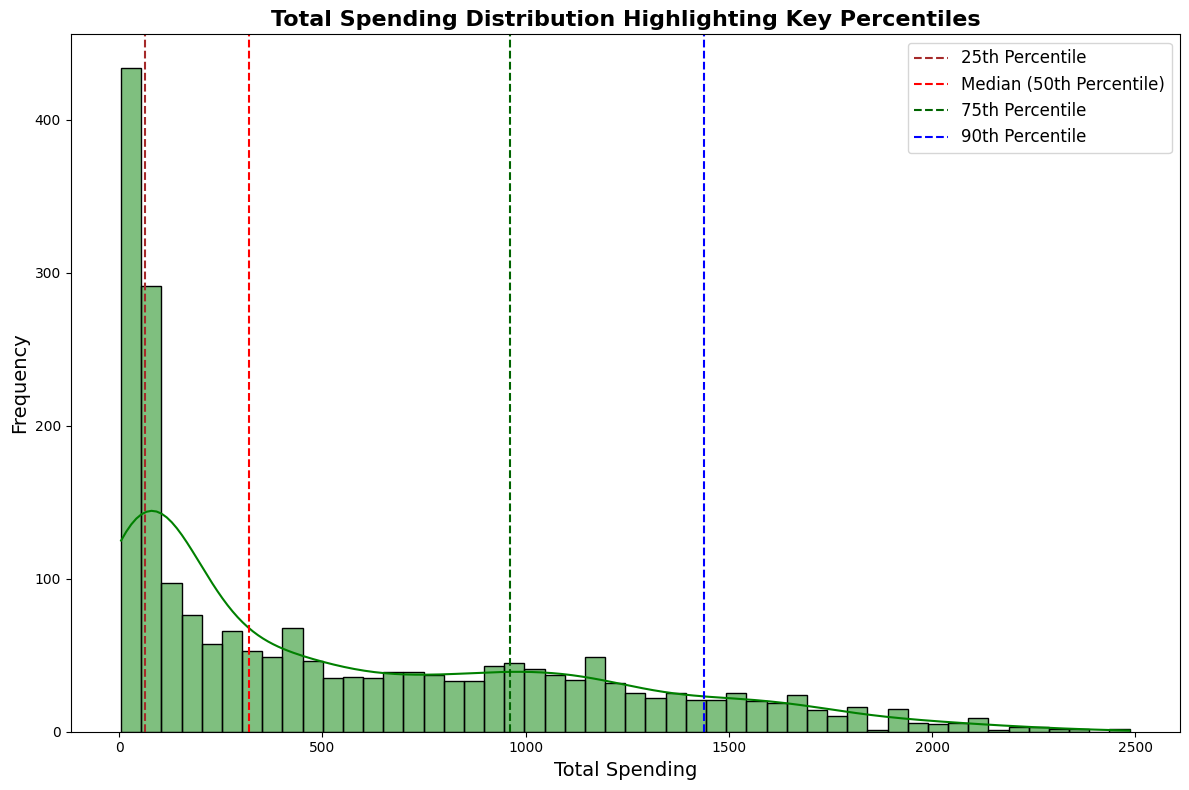

      TotalSpending
0.25           65.0
0.50          319.5
0.75          962.5
0.90         1438.0
0.95         1675.9


In [386]:
# Calculate specific percentiles for Total Spending
total_spending_percentiles = df['TotalSpending'].quantile([0.25, 0.5, 0.75, 0.9, 0.95]).to_frame()

# Visualize the Total Spending distribution, emphasizing critical ranges
plt.figure(figsize=(12, 8))  # Slightly larger for better readability
sns.histplot(df['TotalSpending'], bins=50, kde=True, color='green')  # Softer color with transparency
plt.title('Total Spending Distribution Highlighting Key Percentiles', fontsize=16, fontweight='bold')
plt.axvline(df['TotalSpending'].quantile(0.25), color='brown', linestyle='--', label='25th Percentile')
plt.axvline(df['TotalSpending'].quantile(0.5), color='red', linestyle='--', label='Median (50th Percentile)')
plt.axvline(df['TotalSpending'].quantile(0.75), color='darkgreen', linestyle='--', label='75th Percentile')
plt.axvline(df['TotalSpending'].quantile(0.9), color='blue', linestyle='--', label='90th Percentile')

plt.xlabel('Total Spending', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Display the calculated percentiles in a more readable format
print(total_spending_percentiles)

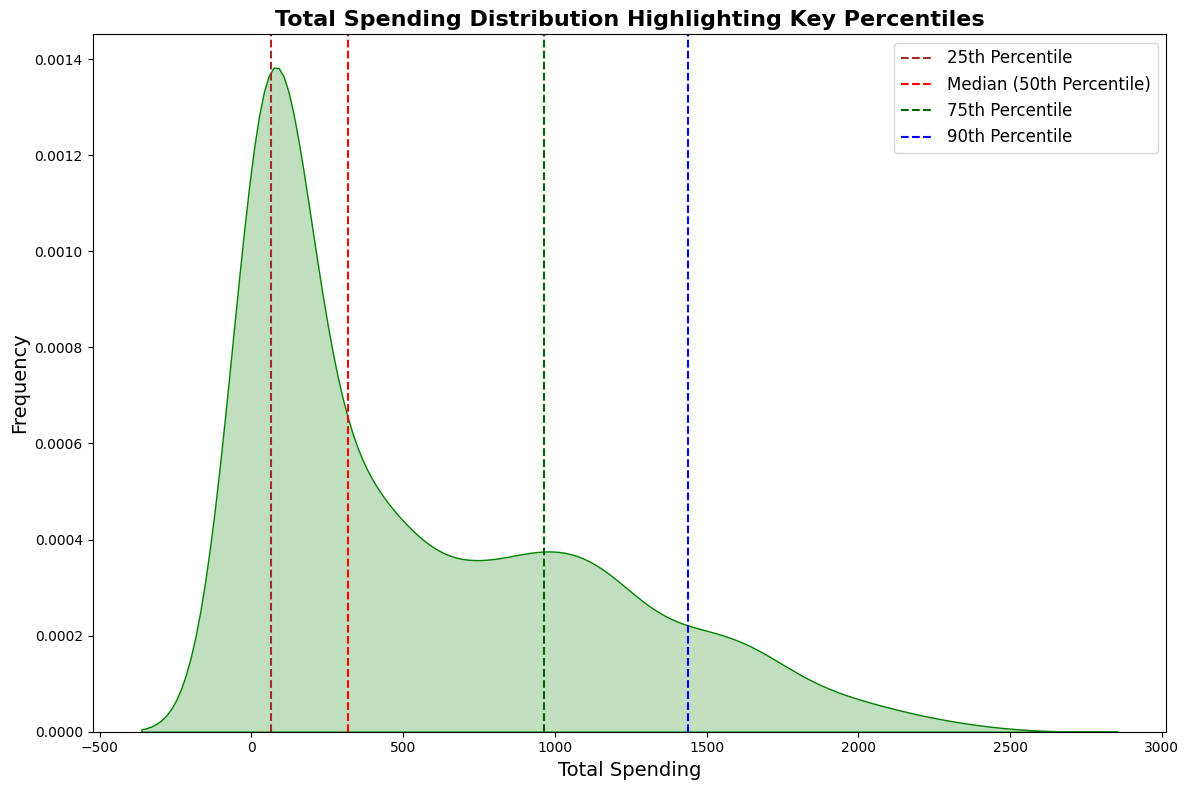

      TotalSpending
0.25           65.0
0.50          319.5
0.75          962.5
0.90         1438.0
0.95         1675.9


In [387]:
# Calculate specific percentiles for Total Spending
total_spending_percentiles = df['TotalSpending'].quantile([0.25, 0.5, 0.75, 0.9, 0.95]).to_frame()

# Visualize the Total Spending distribution, emphasizing critical ranges
plt.figure(figsize=(12, 8))  # Slightly larger for better readability
sns.kdeplot(df['TotalSpending'],  color='green',fill=True)  # Softer color with transparency
plt.title('Total Spending Distribution Highlighting Key Percentiles', fontsize=16, fontweight='bold')
plt.axvline(df['TotalSpending'].quantile(0.25), color='brown', linestyle='--', label='25th Percentile')
plt.axvline(df['TotalSpending'].quantile(0.5), color='red', linestyle='--', label='Median (50th Percentile)')
plt.axvline(df['TotalSpending'].quantile(0.75), color='darkgreen', linestyle='--', label='75th Percentile')
plt.axvline(df['TotalSpending'].quantile(0.9), color='blue', linestyle='--', label='90th Percentile')

plt.xlabel('Total Spending', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Display the calculated percentiles in a more readable format
print(total_spending_percentiles)

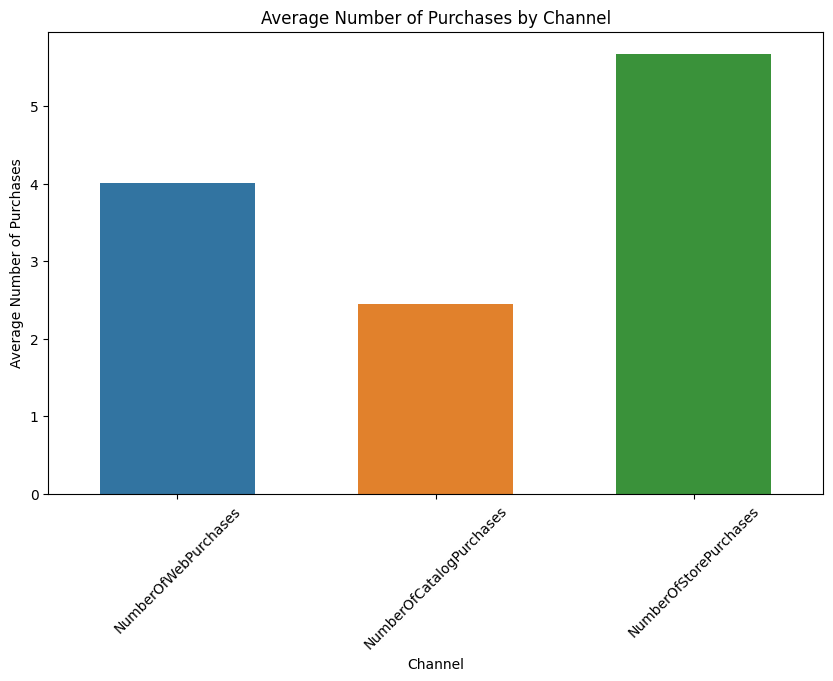

count    2102.000000
mean       14.496194
std         7.587392
min         0.000000
25%         7.000000
50%        14.000000
75%        21.000000
max        39.000000
Name: TotalNumberOfPurchases, dtype: float64

In [388]:
#Analyze Purchase Frequency
purchase_frequency_stats = df['TotalNumberOfPurchases'].describe()

#Channel Preferences - Calculating and visualizing channel usage
channel_preferences = df[['NumberOfWebPurchases', 'NumberOfCatalogPurchases', 'NumberOfStorePurchases']].mean()

# Visualizing channel preferences
plt.figure(figsize=(10, 6))
sns.barplot(x=channel_preferences.index, y=channel_preferences.values,width=0.6)
plt.title('Average Number of Purchases by Channel')
plt.xlabel('Channel')
plt.ylabel('Average Number of Purchases')
plt.xticks(rotation=45)
plt.show()

purchase_frequency_stats

In [389]:
df['NumberOfWebVisitsPerMonth'].describe()

count    2102.000000
mean        5.482398
std         2.362129
min         0.000000
25%         4.000000
50%         6.000000
75%         7.000000
max        20.000000
Name: NumberOfWebVisitsPerMonth, dtype: float64

In [390]:
df['NumberOfDealsPurchases'].describe()

count    2102.000000
mean        2.370124
std         1.885848
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        15.000000
Name: NumberOfDealsPurchases, dtype: float64

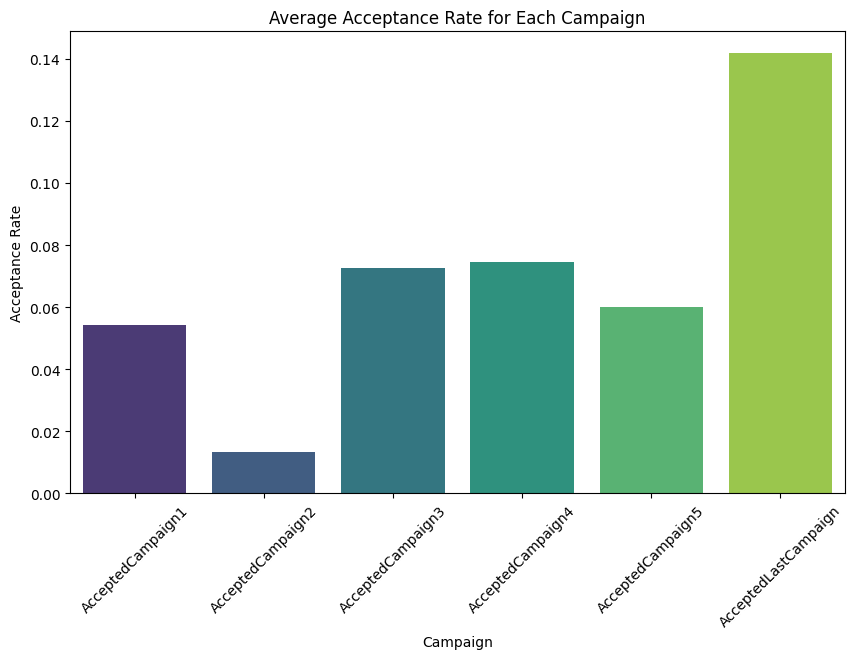

In [391]:
#complete visualization for the accepted campaigns
# Calculate the average acceptance rate for each campaign
campaign_acceptance_rates = df[['AcceptedCampaign1', 'AcceptedCampaign2', 'AcceptedCampaign3', 
                                 'AcceptedCampaign4', 'AcceptedCampaign5', 'AcceptedLastCampaign']].mean()

# Visualize the acceptance rates for each campaign
plt.figure(figsize=(10, 6))
sns.barplot(x=campaign_acceptance_rates.index, y=campaign_acceptance_rates.values, palette='viridis')
plt.title('Average Acceptance Rate for Each Campaign')
plt.xlabel('Campaign')
plt.ylabel('Acceptance Rate')
plt.xticks(rotation=45)
plt.show()


In [392]:
#save the cleaned data
df.to_csv('dataset/marketing_campaign_cleaned.csv', index=False)

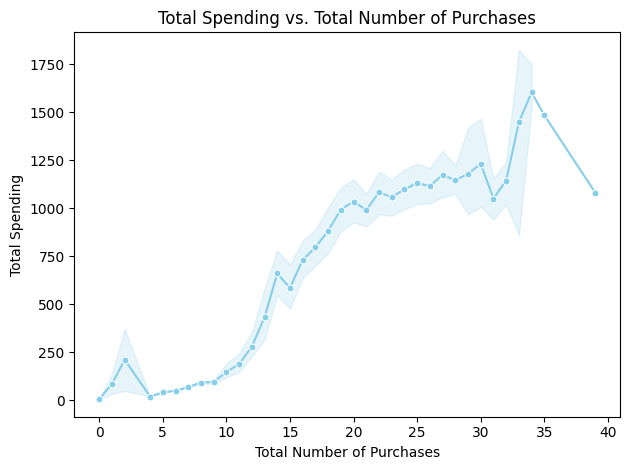

,TotalNumberOfPurchases,TotalSpending
TotalNumberOfPurchases,1.000000,0.770518
TotalSpending,0.770518,1.000000


In [393]:

sns.lineplot(x='TotalNumberOfPurchases', y='TotalSpending', data=df, marker='o', markersize=5, color='skyblue')
plt.title('Total Spending vs. Total Number of Purchases')
plt.xlabel('Total Number of Purchases')
plt.ylabel('Total Spending')
plt.tight_layout()
plt.show()
#type the correlation between the total number of purchases and the total spending  
df[['TotalNumberOfPurchases', 'TotalSpending']].corr()


In [394]:
#In order to move one with the analysis we want to look for the most important features that will be keys for clustring
#As we saw there is a high correlation between the total number of purchases and the total spending
#indicating that our submission of the spending of different product categories and using this as the spending of the customer
#for this company is a valid hypothesis
#to make the multivariant analysis relevant and focused we will compare the features with key features like total spending

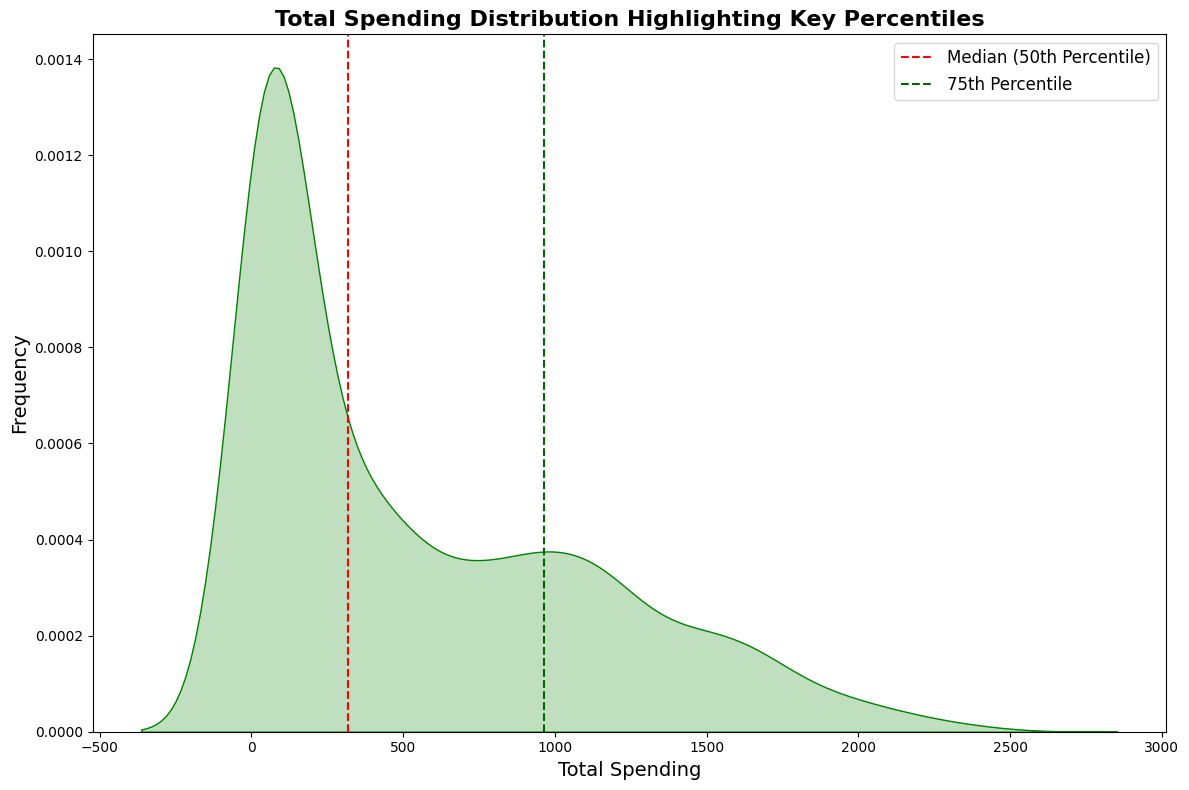

      TotalSpending
0.25           65.0
0.50          319.5
0.75          962.5
0.90         1438.0
0.95         1675.9


In [395]:
#we could assume that total spending is the main feature that will be used to clustre the customers

# Visualize the Total Spending distribution, while segmenting the customers into 3 segments
plt.figure(figsize=(12, 8))  # Slightly larger for better readability
sns.kdeplot(df['TotalSpending'],  color='green',fill=True)  # Softer color with transparency
plt.title('Total Spending Distribution Highlighting Key Percentiles', fontsize=16, fontweight='bold')
plt.axvline(df['TotalSpending'].quantile(0.5), color='red', linestyle='--', label='Median (50th Percentile)')
plt.axvline(df['TotalSpending'].quantile(0.75), color='darkgreen', linestyle='--', label='75th Percentile')

plt.xlabel('Total Spending', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Display the calculated percentiles in a more readable format
print(total_spending_percentiles)

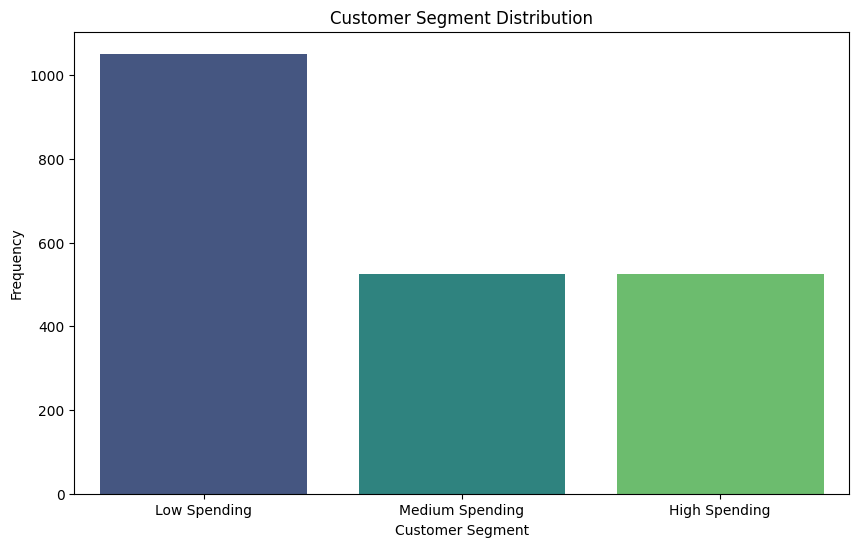

In [396]:
#we could now say that there is three major segments of customers the average low spending customers, the medium and the high spending 
#low spending customers are the ones that have a total spending less than the 50th percentile
#medium spending customers are the ones that have a total spending less than the 75th percentile and more than the 50th percentile
#high spending customers are the ones that have a total spending more than the 75th percentile

#create a new column for the segment of the customer
df['CustomerSegment'] = pd.cut(df['TotalSpending'], bins=[0, df['TotalSpending'].quantile(0.5), df['TotalSpending'].quantile(0.75), df['TotalSpending'].max()], labels=['Low Spending', 'Medium Spending', 'High Spending'])

# Visualize the distribution of the customer segments
plt.figure(figsize=(10, 6))
sns.countplot(x='CustomerSegment', data=df, palette='viridis')
plt.title('Customer Segment Distribution')
plt.xlabel('Customer Segment')
plt.ylabel('Frequency')
plt.show()


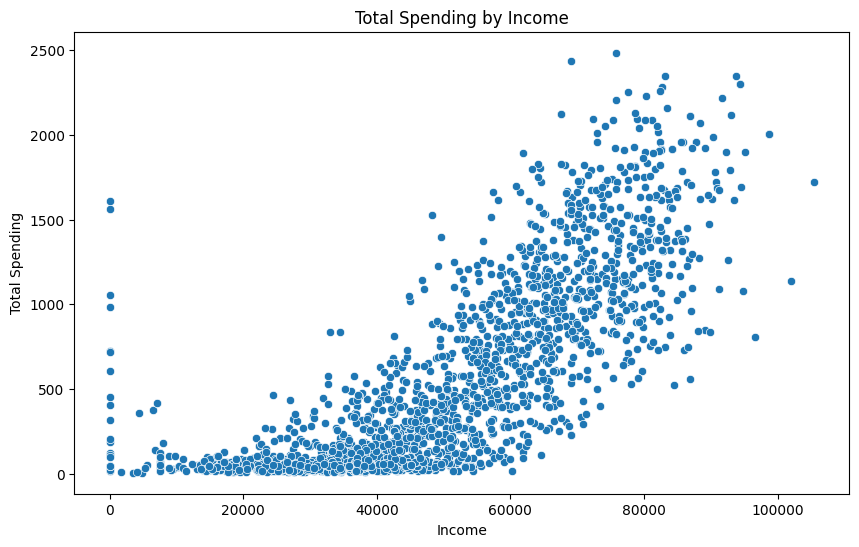

,Income,TotalSpending
Income,1.000000,0.796117
TotalSpending,0.796117,1.000000


In [397]:
#scatter plot between income and total spending
#while coloring the different segments of the customer
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='TotalSpending', data=df)
plt.title('Total Spending by Income')
plt.xlabel('Income')
plt.ylabel('Total Spending')
plt.show()
#correlation between income and total spending
df[['Income', 'TotalSpending']].corr()



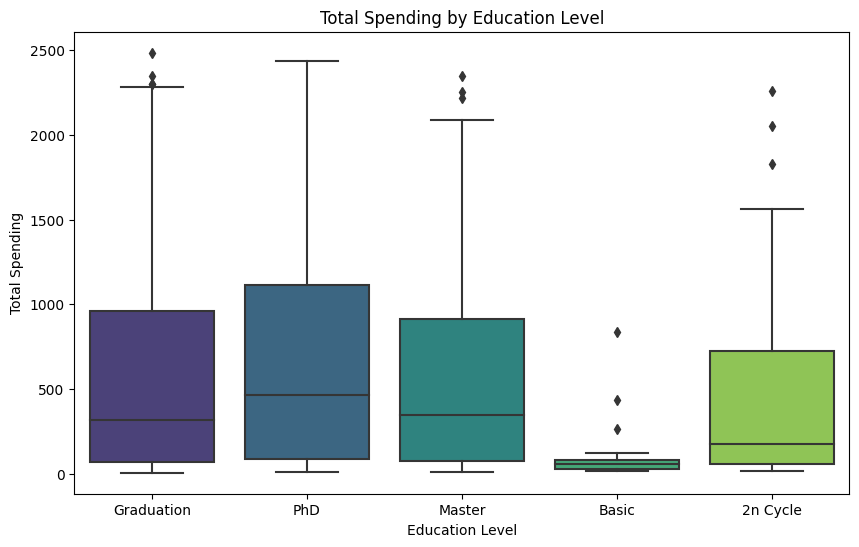

In [398]:
#analyse the relationship between education, and the total spending using box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education', y='TotalSpending', data=df, palette='viridis')
plt.title('Total Spending by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Total Spending')
plt.show()


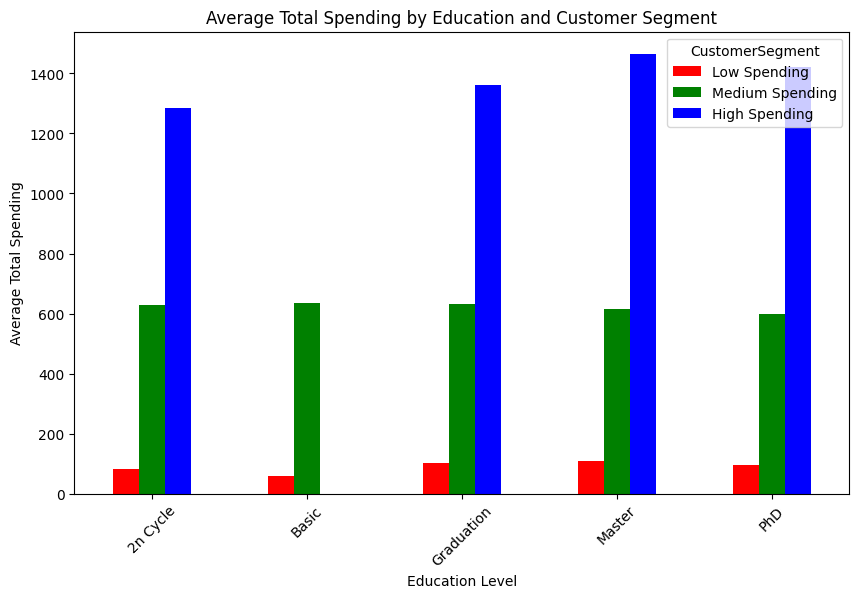

In [320]:
#show the relationship between education variables and the customer segments
# Create a pivot table
education_segment_pivot = df.pivot_table(index='Education', columns='CustomerSegment', values='TotalSpending', aggfunc='mean')

# Visualize the pivot table
education_segment_pivot.plot(kind='bar', color=['red', 'green', 'blue'], figsize=(10, 6))
plt.title('Average Total Spending by Education and Customer Segment')
plt.xlabel('Education Level')
plt.ylabel('Average Total Spending')
plt.xticks(rotation=45)
plt.show()




In [402]:
#based on the analysis there is no segnificant relationship between the education level and the spending of the customer
#we could say that the education level is not a good feature to use to clustre the customers
#clustring the education column values into two values one containing the graduation, phd and mster and the other containing the 2 other values
#the first column will be called higher education and the second one will be called lower education
df['Education'] = df['Education'].replace(['Basic', '2n Cycle'], 'Basic Education')

#print the count of lower education vs higher education

df['Education'].value_counts()


Graduation         1039
PhD                 468
Master              358
Basic Education     237
Name: Education, dtype: Int64

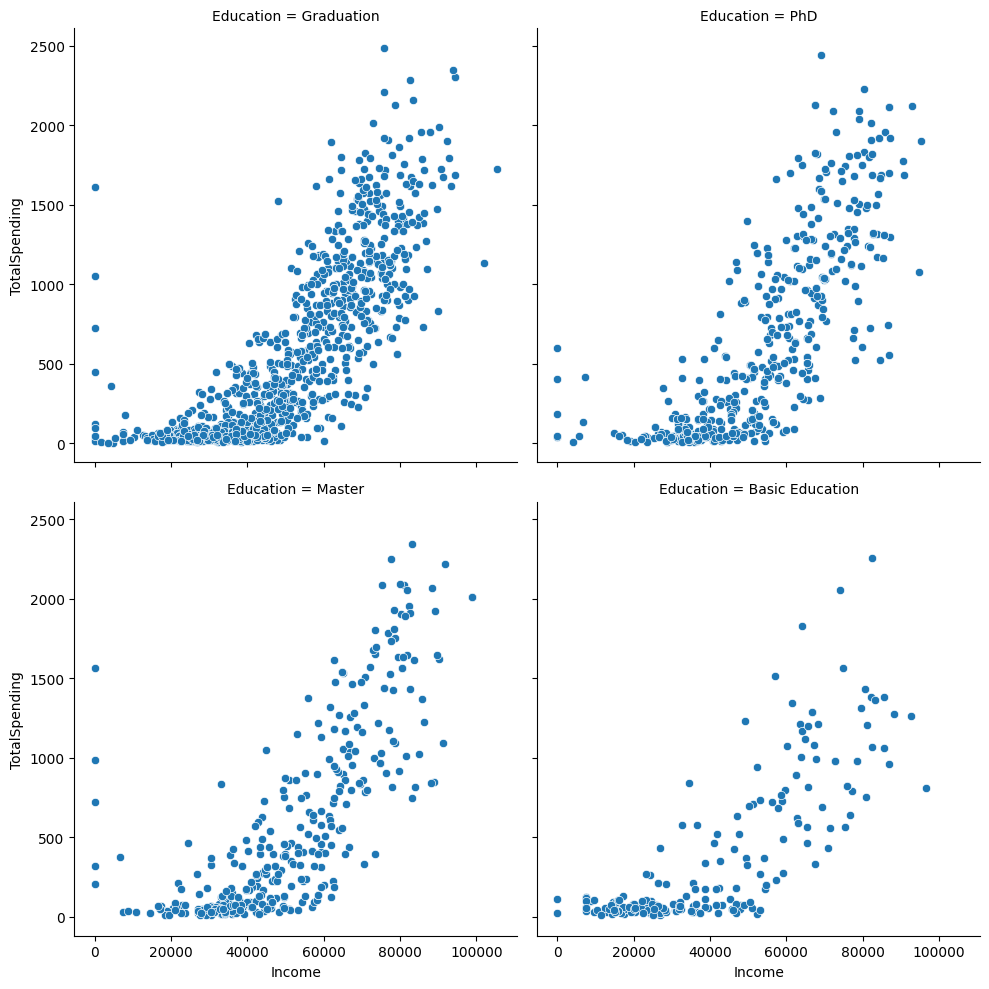

In [403]:
sns.relplot(x='Income', y='TotalSpending', data=df, col='Education',kind='scatter', col_wrap=2)
plt.xlabel('Income')
plt.ylabel('Total Spending')
plt.show()


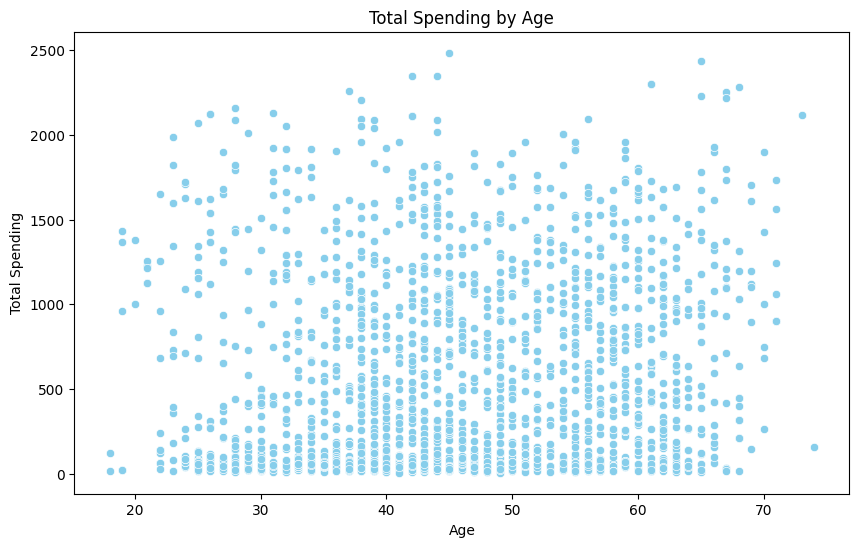

In [322]:
#scatter plot between age and the spending of the customer
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='TotalSpending', data=df, color='skyblue')
plt.title('Total Spending by Age')
plt.xlabel('Age')
plt.ylabel('Total Spending')
plt.show()
# Age doesn't seem to have a strong correlation with Total Spending

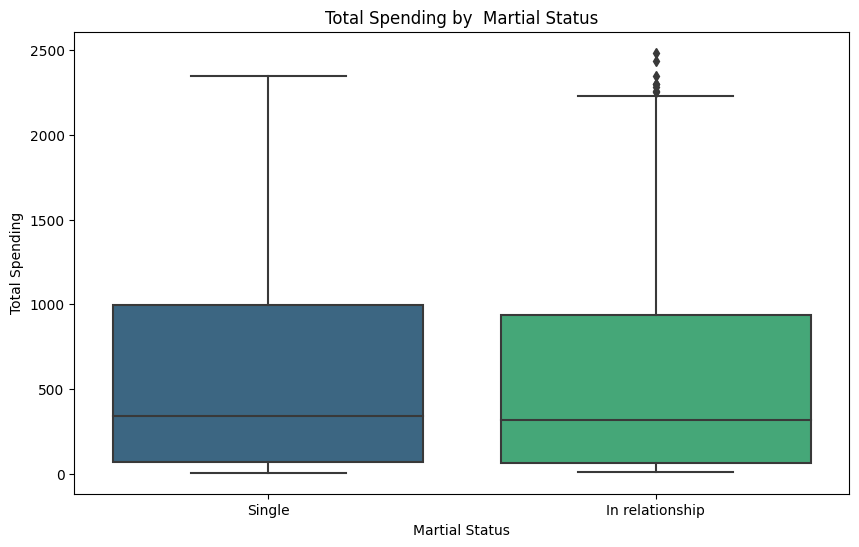

In [323]:
##analyse the relationship between education, and the total spending using box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Marital_Status', y='TotalSpending', data=df, palette='viridis')
plt.title('Total Spending by  Martial Status')
plt.xlabel('Martial Status')
plt.ylabel('Total Spending')
plt.show()
#there is no relationship between the marital status and the total spending of the customer

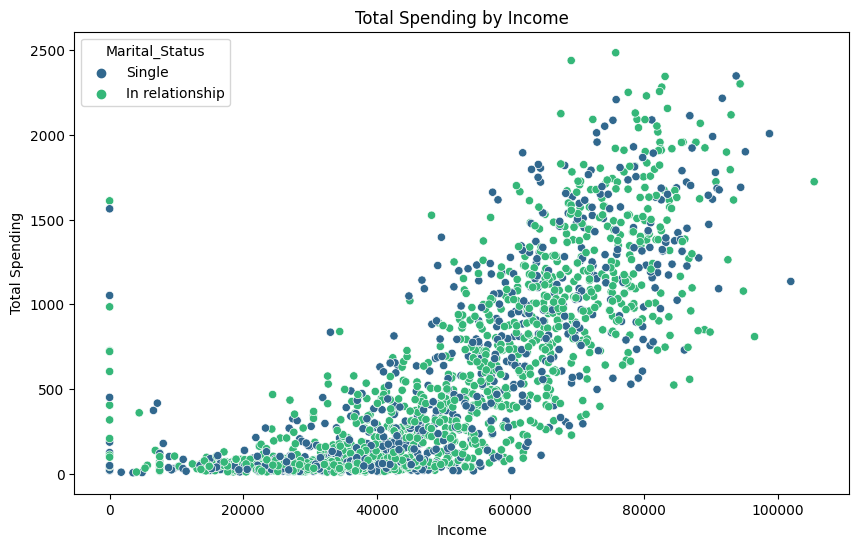

In [344]:
#scatter plot between income and total spending
#while coloring the different segments of the customer
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='TotalSpending', data=df, hue='Marital_Status', palette='viridis')
plt.title('Total Spending by Income')
plt.xlabel('Income')
plt.ylabel('Total Spending')
plt.show()


In [324]:
df['Marital_Status'].value_counts()

In relationship    1356
Single              746
Name: Marital_Status, dtype: Int64

In [324]:
#are having teens at home incluence spending more than having kids at home? 
#compare having kids at home to having teens at home with the total spending
#describe number of kids at home and number of teens at home
df[['NumberOfKidsAtHome', 'NumberOfTeensAtHome','TotalNumberOfChildren','TotalSpending']].describe()


,NumberOfKidsAtHome,NumberOfTeensAtHome,TotalNumberOfChildren,TotalSpending
count,2102.000000,2102.000000,2102.000000,2102.000000
mean,0.468601,0.525214,0.993815,551.869648
std,0.542978,0.546794,0.745259,566.170429
min,0.000000,0.000000,0.000000,5.000000
25%,0.000000,0.000000,0.000000,65.000000
50%,0.000000,1.000000,1.000000,319.500000
75%,1.000000,1.000000,1.000000,962.500000
max,2.000000,2.000000,3.000000,2486.000000


In [328]:
grouped_data = df.groupby(['NumberOfKidsAtHome', 'NumberOfTeensAtHome']).size().reset_index(name='NumberOfCustomers')
grouped_data 

,NumberOfKidsAtHome,NumberOfTeensAtHome,NumberOfCustomers
0,0,0,537
1,0,1,598
2,0,2,30
3,1,0,496
4,1,1,371
5,1,2,22
6,2,0,17
7,2,1,31


C:/Users/USCS/AppData/Local/Temp/xpython_15532/3482113360.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.relplot(x='Income', y='TotalSpending', data=df, col='NumberOfKidsAtHome', row='NumberOfTeensAtHome', palette='viridis')


<Figure size 1000x600 with 0 Axes>

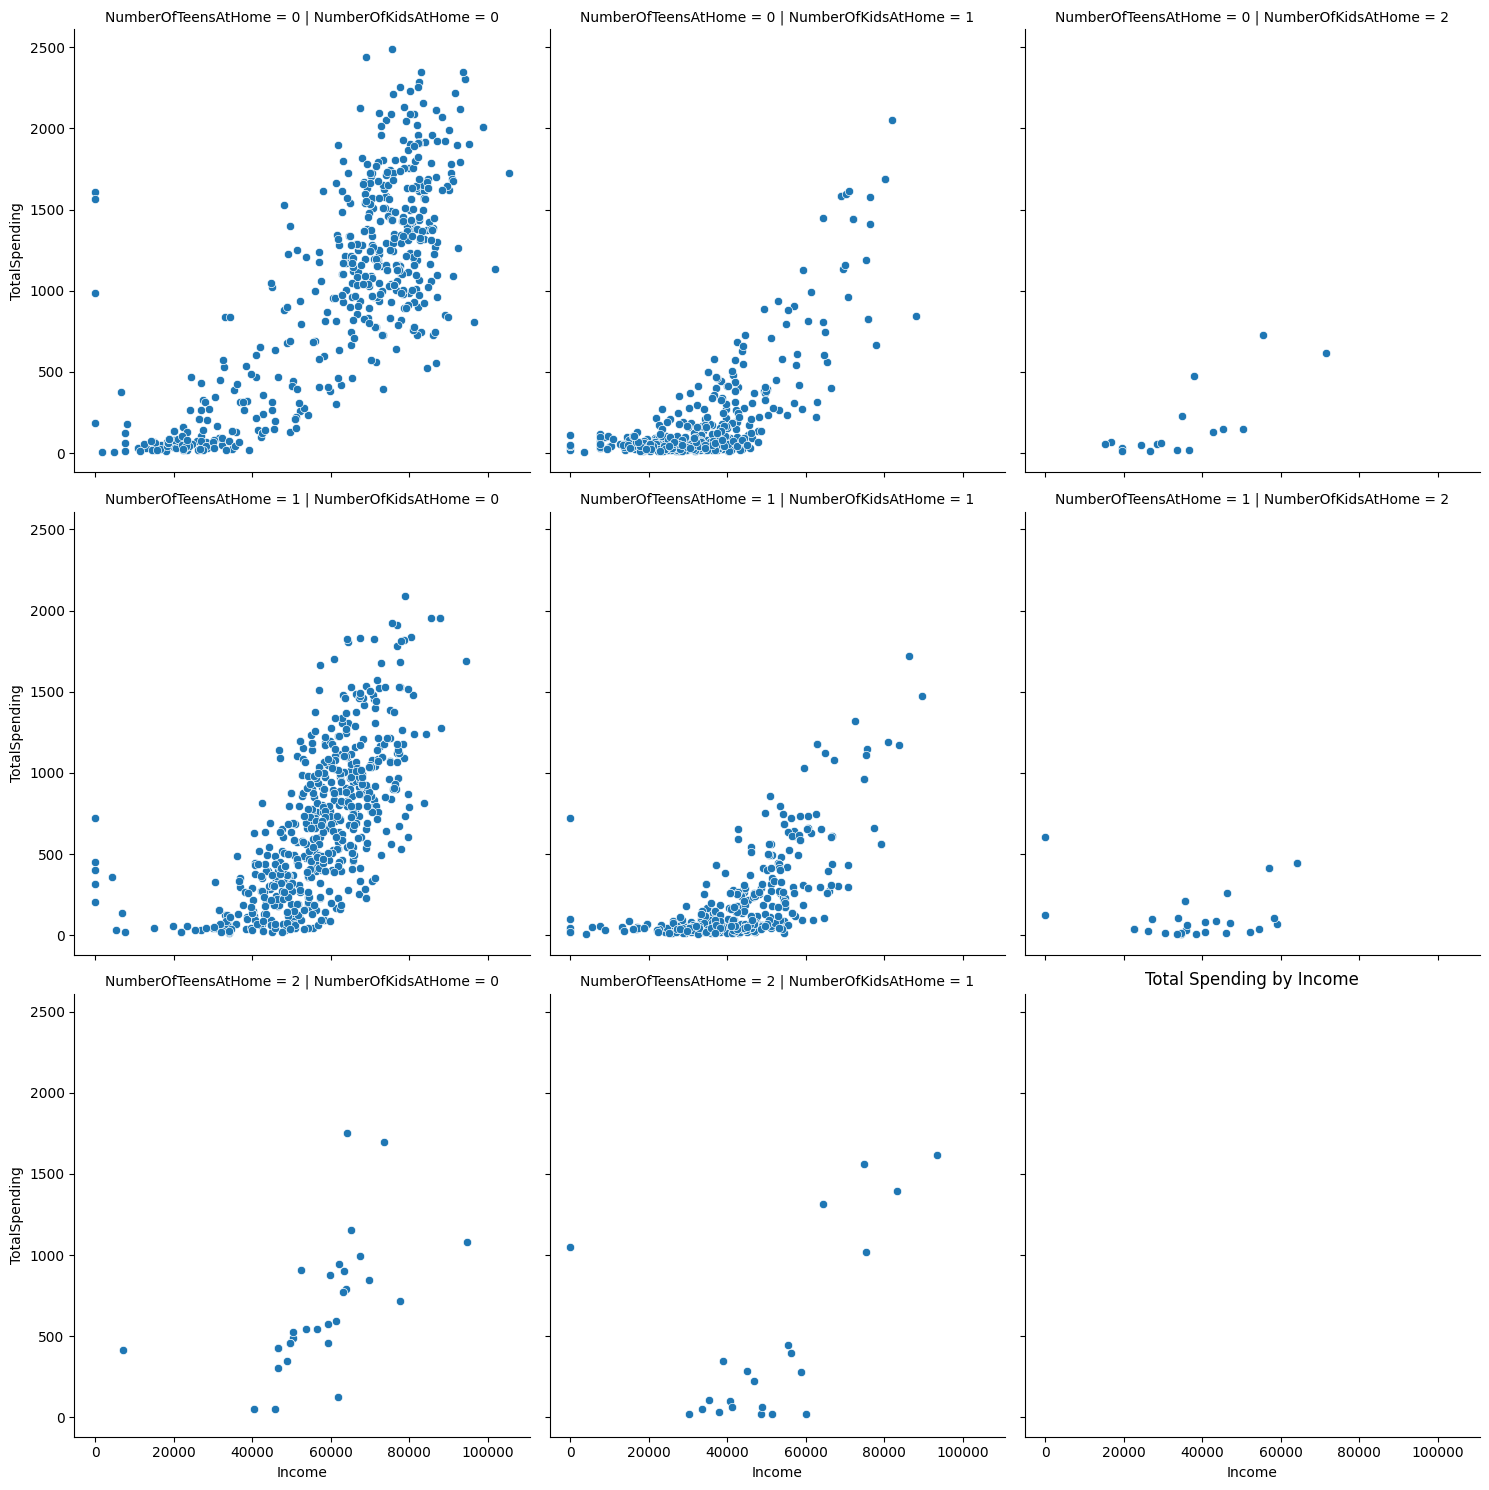

In [329]:
#scatter plot using relplot between income and total spending and the number of kids at home and the number of teens at home
#in rows and columns
plt.figure(figsize=(10, 6))
sns.relplot(x='Income', y='TotalSpending', data=df, col='NumberOfKidsAtHome', row='NumberOfTeensAtHome', palette='viridis')
plt.title('Total Spending by Income')
plt.xlabel('Income')
plt.ylabel('Total Spending')
plt.show()





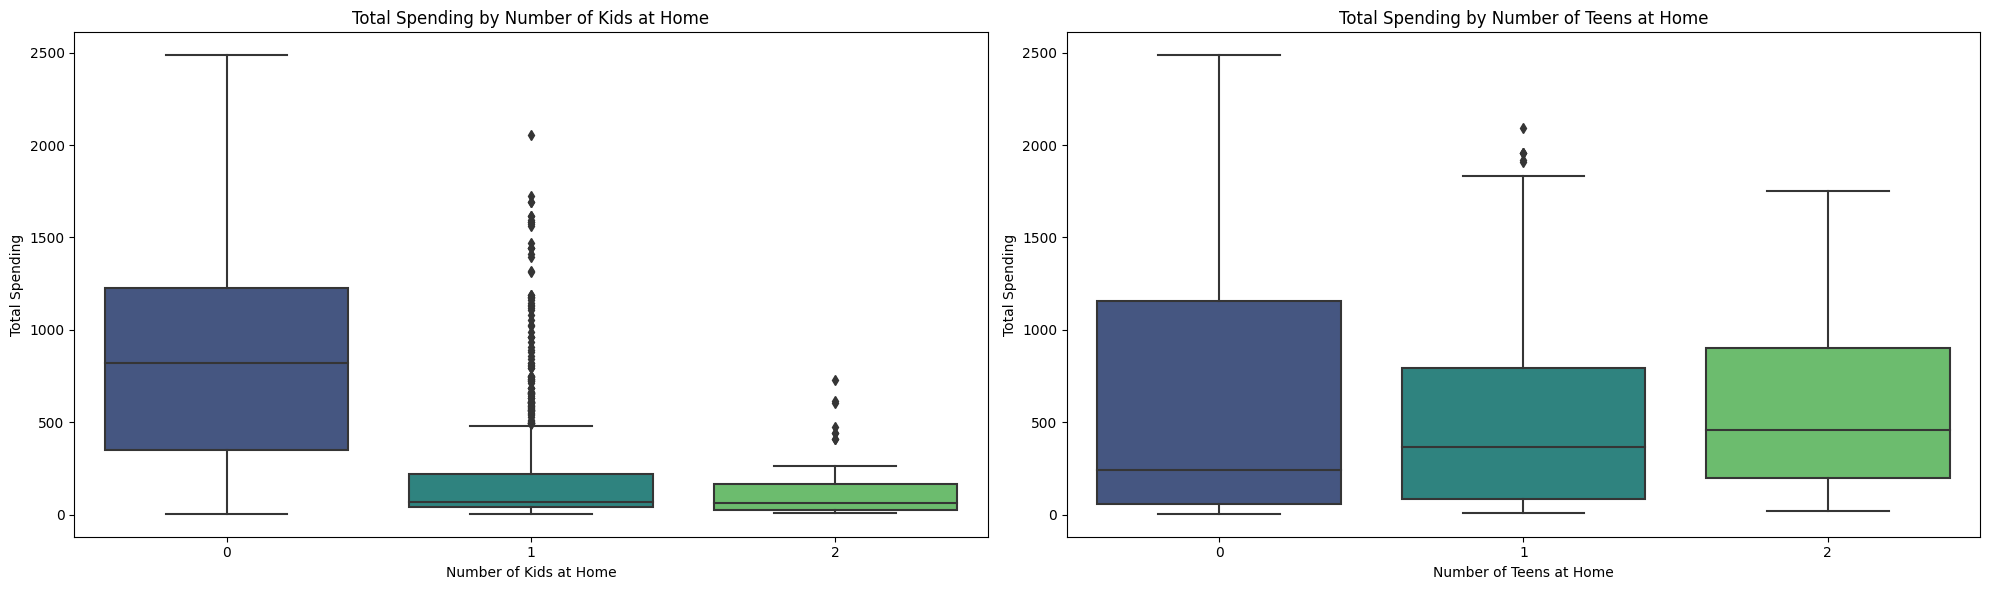

NumberOfKidsAtHome    -0.604935
NumberOfTeensAtHome   -0.002367
TotalSpending          1.000000
Name: TotalSpending, dtype: float64

In [330]:
#create box plot for the number of kids at home and the total spending and beside it the number of teens at home and the total spending
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))  # 1 row, 2 columns

# Plot for number of kids at home
sns.boxplot(x='NumberOfKidsAtHome', y='TotalSpending', data=df, ax=axes[0], palette='viridis')
axes[0].set_title('Total Spending by Number of Kids at Home')
axes[0].set_xlabel('Number of Kids at Home')
axes[0].set_ylabel('Total Spending')

# Plot for number of teens at home
sns.boxplot(x='NumberOfTeensAtHome', y='TotalSpending', data=df, ax=axes[1], palette='viridis')
axes[1].set_title('Total Spending by Number of Teens at Home')
axes[1].set_xlabel('Number of Teens at Home')
axes[1].set_ylabel('Total Spending')

plt.tight_layout()
plt.show()

#correlation between the number of kids at home and the total spending using the spearman method
df[['NumberOfKidsAtHome','NumberOfTeensAtHome', 'TotalSpending']].corr(method='spearman')['TotalSpending']



In [332]:
#there is negative correlation between the number of kids at home and the total spending
#using this in the clustring algorithm still in debate

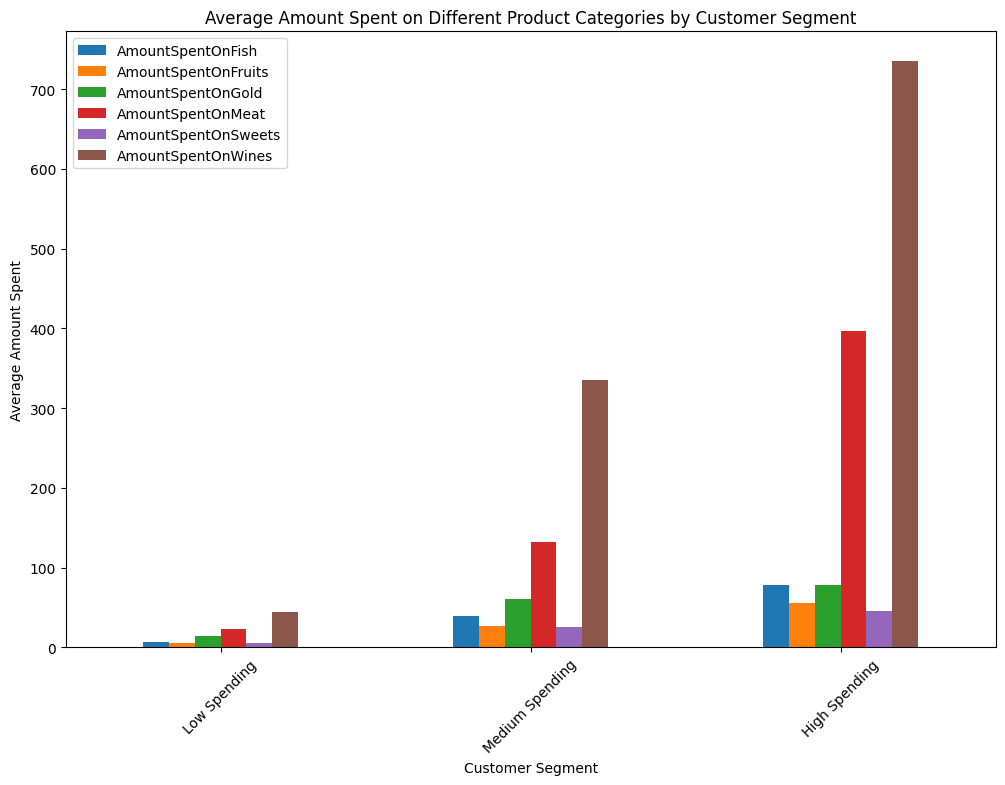

In [333]:
#analysis for the amount spent on different product categories and total spending, are more spending in general 
#is increased by specific categories of products
# Create a pivot table
spending_pivot = df.pivot_table(index='CustomerSegment', values=spending_cols, aggfunc='mean')

# Visualize the pivot table
spending_pivot.plot(kind='bar', figsize=(12, 8))
plt.title('Average Amount Spent on Different Product Categories by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Average Amount Spent')
plt.xticks(rotation=45)
plt.show()

#the Meat and wine are overall the highest in spending from what we seen early in the analysis, and it is the most 
#contributer to the total spending of the customer
#the other categories didn't got increase in spending but that might be due to the nature of the products themselves

In [334]:
df[['NumberOfWebPurchases', 'NumberOfCatalogPurchases', 'NumberOfStorePurchases']].describe()

,NumberOfWebPurchases,NumberOfCatalogPurchases,NumberOfStorePurchases
count,2102.000000,2102.000000,2102.000000
mean,4.003330,2.444814,5.677926
std,2.697768,2.661365,3.203324
min,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000
50%,3.000000,1.000000,5.000000
75%,6.000000,4.000000,8.000000
max,25.000000,11.000000,13.000000


In [335]:
#does the medium of customer purchases effect the total number of purchases
# Create a pivot table
channel_pivot = df.pivot_table(index='CustomerSegment', values=['NumberOfWebPurchases', 'NumberOfCatalogPurchases', 'NumberOfStorePurchases'], aggfunc='mean')

channel_pivot

,NumberOfCatalogPurchases,NumberOfStorePurchases,NumberOfWebPurchases
CustomerSegment,,,
Low Spending,0.550904,3.259753,2.128449
Medium Spending,3.062857,7.506667,6.080000
High Spending,5.612167,8.684411,5.676806


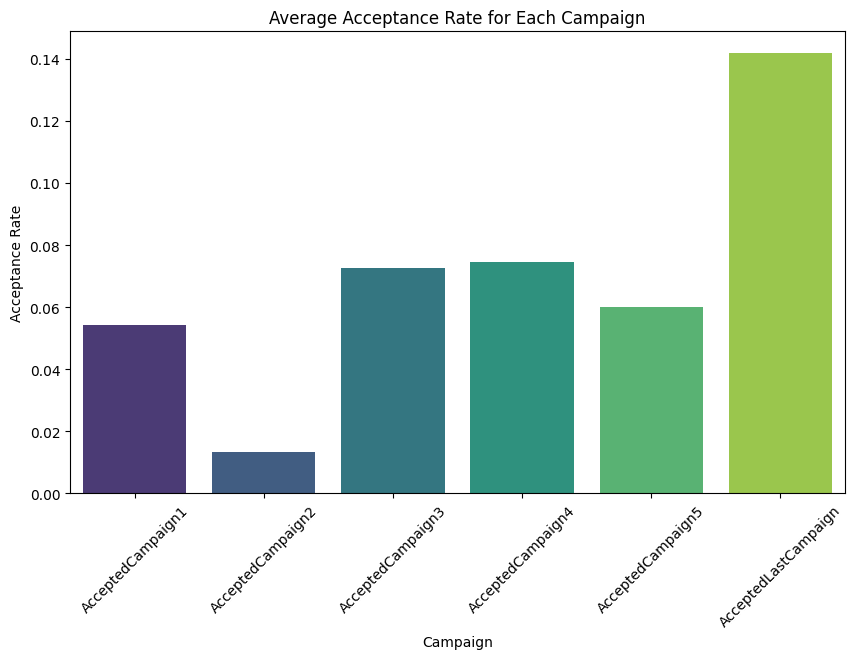

In [336]:

campaign_acceptance_rates = df[['AcceptedCampaign1', 'AcceptedCampaign2', 'AcceptedCampaign3', 
                                 'AcceptedCampaign4', 'AcceptedCampaign5', 'AcceptedLastCampaign']].mean()

# Visualize the acceptance rates for each campaign
plt.figure(figsize=(10, 6))
sns.barplot(x=campaign_acceptance_rates.index, y=campaign_acceptance_rates.values, palette='viridis')
plt.title('Average Acceptance Rate for Each Campaign')
plt.xlabel('Campaign')
plt.ylabel('Acceptance Rate')
plt.xticks(rotation=45)
plt.show()


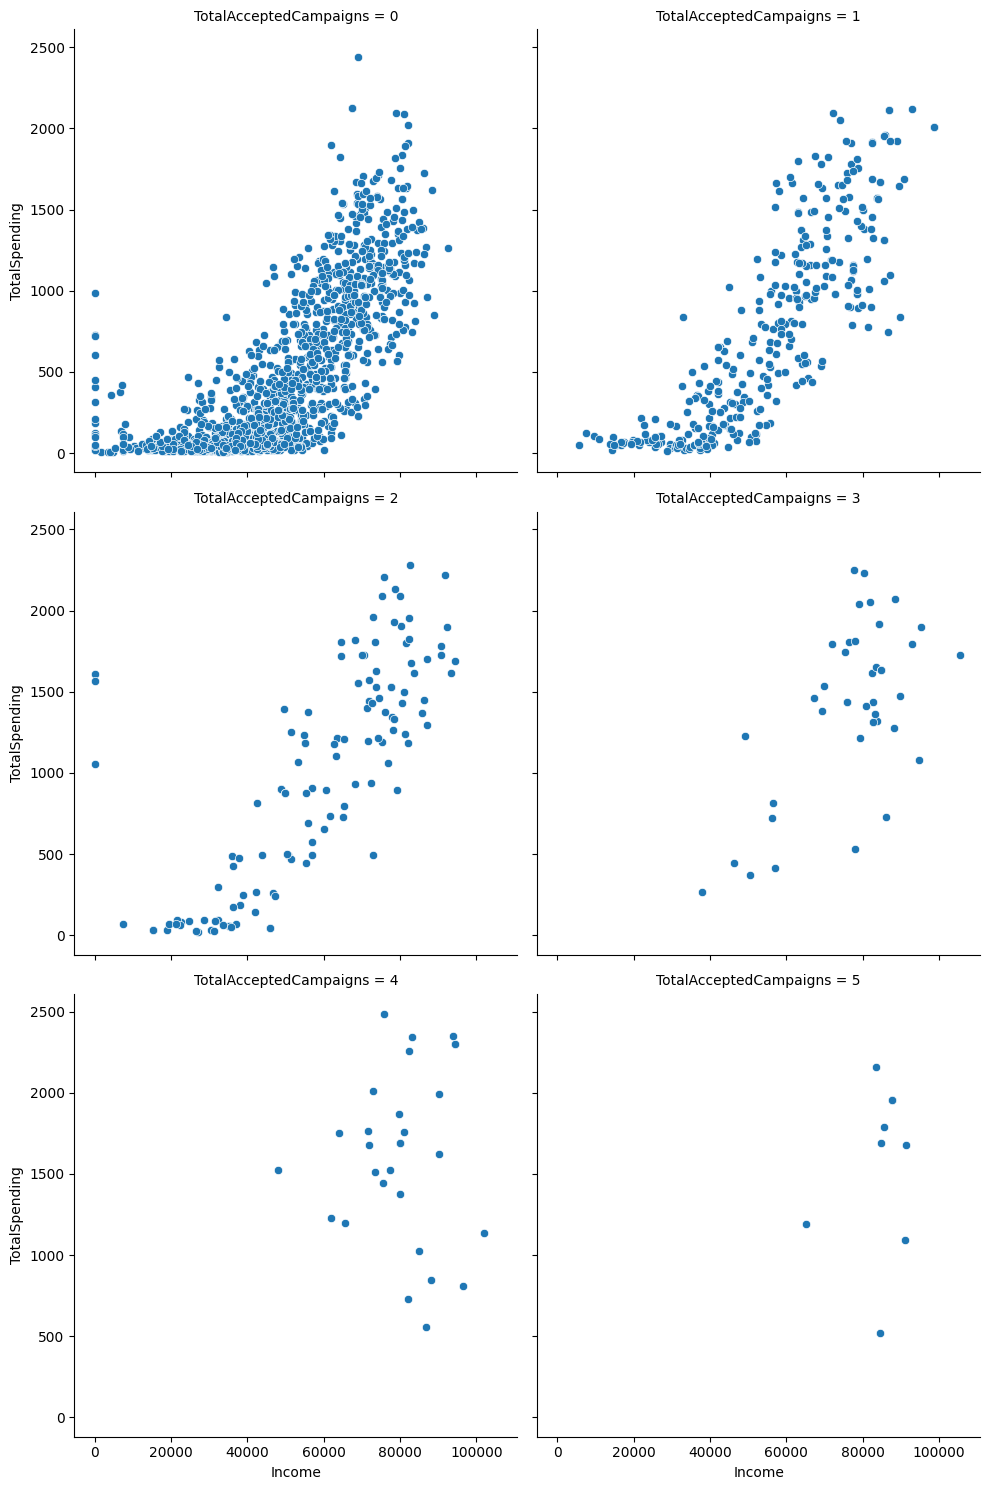

In [416]:
sns.relplot(x='Income', y='TotalSpending', data=df, kind='scatter',col='TotalAcceptedCampaigns',col_wrap=2 )

plt.show()


In [414]:
df[['AcceptedCampaign1', 'AcceptedCampaign2', 'AcceptedCampaign3', 
                                 'AcceptedCampaign4', 'AcceptedCampaign5', 'AcceptedLastCampaign','TotalAcceptedCampaigns']].head()

,AcceptedCampaign1,AcceptedCampaign2,AcceptedCampaign3,AcceptedCampaign4,AcceptedCampaign5,AcceptedLastCampaign,TotalAcceptedCampaigns
0,0,0,0,0,0,1,1
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0


In [337]:
#compare the total accepted campaigns and the total spending
# Create a pivot table
campaigns_spending_pivot = df.pivot_table(index='CustomerSegment', values=['TotalAcceptedCampaigns'], aggfunc='mean')

campaigns_spending_pivot


,TotalAcceptedCampaigns
CustomerSegment,
Low Spending,0.174120
Medium Spending,0.365714
High Spending,0.952471


In [335]:
#spearmans correlation between the total accepted campaigns and the total spending
df[['TotalAcceptedCampaigns'] ].value_counts()


TotalAcceptedCampaigns
0                         1560
1                          335
2                          127
3                           42
4                           29
5                            9
dtype: int64

In [339]:
#I won't try to analyse the accepted campaigns and the total spending, because the total spending is dpended by the number of purchases
#and the medium of purachases, even if a specific accepted campaign increased the total spending, we can't imply that this is ther reason 
#because there other factors
#but what we can do here is look at the acceptet campaigns and the medium of purchases
# to udnerstand more what types of campaing they are

In [340]:
#there is a correlation between the number of catalog purchases, total spending, income and the number of accepted campaigns
#this means that: 
#1.Marketing campaigns usually uses catalogs to promote their products
#2.The more the customer spends the more likely he will accept a campaign

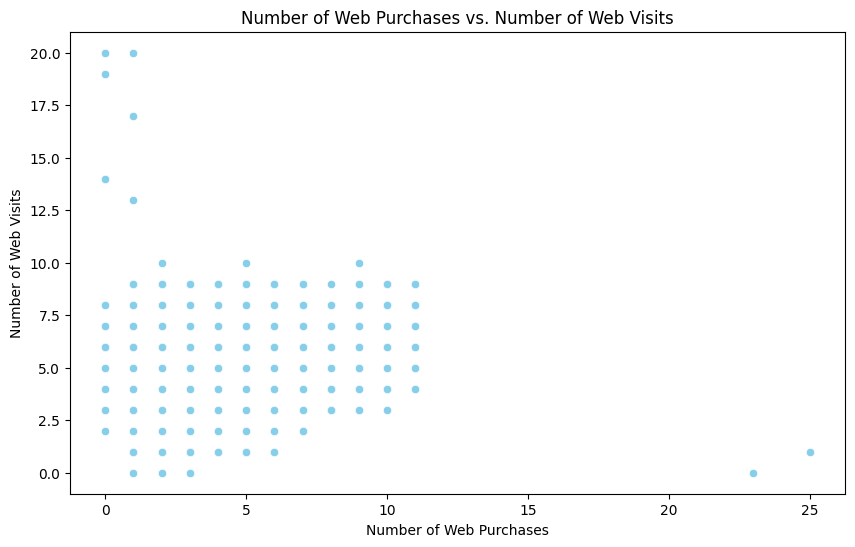

,NumberOfWebPurchases,NumberOfWebVisitsPerMonth
NumberOfWebPurchases,1.000000,-0.096898
NumberOfWebVisitsPerMonth,-0.096898,1.000000


In [341]:
#visualize the scatter plot between web purchases and web visits
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NumberOfWebPurchases', y='NumberOfWebVisitsPerMonth', data=df, color='skyblue')
plt.title('Number of Web Purchases vs. Number of Web Visits')
plt.xlabel('Number of Web Purchases')
plt.ylabel('Number of Web Visits')
plt.show()
#correration between the number of web purchases and the number of web visits
df[['NumberOfWebPurchases', 'NumberOfWebVisitsPerMonth']].corr(method='spearman')



C:/Users/USCS/AppData/Local/Temp/xpython_15532/1599703676.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)


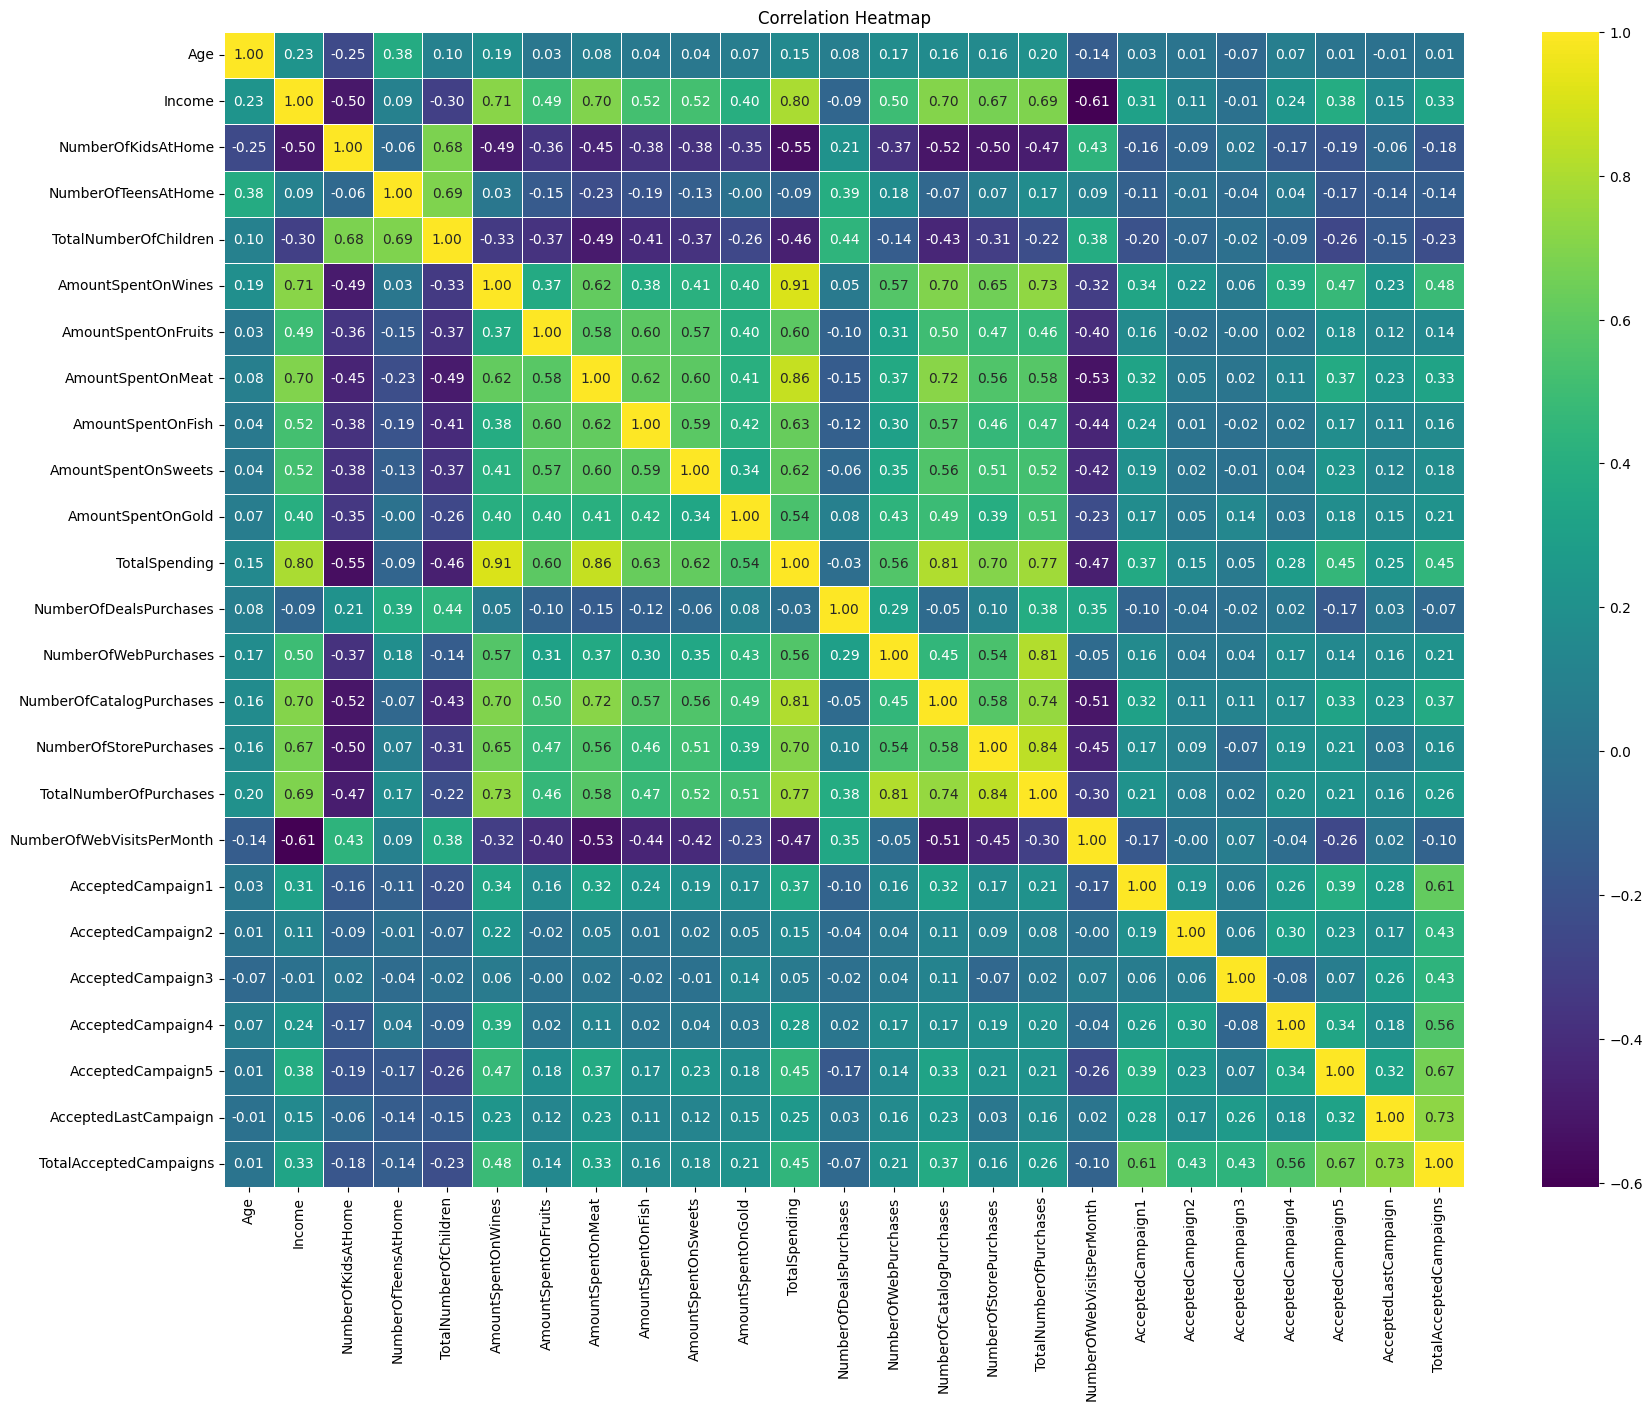

In [342]:
#create a full heatmap to see the correlation between all the features
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [234]:
#save the cleaned data
df.to_csv('dataset/marketing_campaign_cleaned.csv', index=False)

# CLUSTRING
## WOOHOO

## Importing necessary libraries

In [235]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



In [343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2102 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Age                        2102 non-null   int64   
 1   Education                  2102 non-null   string  
 2   Marital_Status             2102 non-null   string  
 3   Income                     2102 non-null   int64   
 4   NumberOfKidsAtHome         2102 non-null   int64   
 5   NumberOfTeensAtHome        2102 non-null   int64   
 6   TotalNumberOfChildren      2102 non-null   int64   
 7   AmountSpentOnWines         2102 non-null   int64   
 8   AmountSpentOnFruits        2102 non-null   int64   
 9   AmountSpentOnMeat          2102 non-null   int64   
 10  AmountSpentOnFish          2102 non-null   int64   
 11  AmountSpentOnSweets        2102 non-null   int64   
 12  AmountSpentOnGold          2102 non-null   int64   
 13  TotalSpending              2102 n

In [237]:
Age
Education
Marital_Status
Income
NumberOfKidsAtHome
NumberOfTeensAtHome
TotalNumberOfChildren
AmountSpentOnWines
AmountSpentOnFruits
AmountSpentOnMeat
AmountSpentOnFish
AmountSpentOnSweets
AmountSpentOnGold
TotalSpending
NumberOfDealsPurchases
NumberOfWebPurchases
NumberOfCatalogPurchases
NumberOfStorePurchases
TotalNumberOfPurchases
NumberOfWebVisitsPerMonth
TotalNumberOfVisits
TotalSpentOnline
TotalAcceptedCampaigns
CustomerSegment

In [474]:
#all int columns into a list from the dataframe
int_cols = df.select_dtypes(include=['int64']).columns.tolist()
print(int_cols)


['Age', 'Income', 'NumberOfKidsAtHome', 'NumberOfTeensAtHome', 'TotalNumberOfChildren', 'AmountSpentOnWines', 'AmountSpentOnFruits', 'AmountSpentOnMeat', 'AmountSpentOnFish', 'AmountSpentOnSweets', 'AmountSpentOnGold', 'TotalSpending', 'NumberOfDealsPurchases', 'NumberOfWebPurchases', 'NumberOfCatalogPurchases', 'NumberOfStorePurchases', 'TotalNumberOfPurchases', 'NumberOfWebVisitsPerMonth', 'AcceptedCampaign1', 'AcceptedCampaign2', 'AcceptedCampaign3', 'AcceptedCampaign4', 'AcceptedCampaign5', 'AcceptedLastCampaign', 'TotalAcceptedCampaigns']


## Preprocessing

In [459]:
# Define categorical and numerical columns again due to the reset
categorical_cols = ['Education']

numerical_cols=['TotalSpending','Income', 'TotalNumberOfChildren', 'AmountSpentOnWines', 'AmountSpentOnFruits', 'AmountSpentOnMeat', 'AmountSpentOnFish', 'AmountSpentOnSweets', 'AmountSpentOnGold', 'TotalSpending', 'NumberOfDealsPurchases', 'NumberOfWebPurchases', 'NumberOfCatalogPurchases', 'NumberOfStorePurchases', 'TotalNumberOfPurchases', 'NumberOfWebVisitsPerMonth', 'AcceptedCampaign1', 'AcceptedCampaign2', 'AcceptedCampaign3', 'AcceptedCampaign4', 'AcceptedCampaign5', 'AcceptedLastCampaign', 'TotalAcceptedCampaigns']
# Create the preprocessing pipelines for both numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps into a single ColumnTransformer pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
 ])

# Apply the ColumnTransformer to our data
data_prepared = preprocessor.fit_transform(df)

# The result is a NumPy array. Let's convert it to a DataFrame for better readability
# Get feature names from onehot encoder
onehot_features = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out()

all_features = numerical_cols + onehot_features.tolist()
onehot_features.tolist()

# Create a DataFrame with the transformed features
data_prepared_df = pd.DataFrame(data_prepared, columns=all_features)

data_prepared_df.head()

,TotalSpending,Income,TotalNumberOfChildren,AmountSpentOnWines,AmountSpentOnFruits,AmountSpentOnMeat,AmountSpentOnFish,AmountSpentOnSweets,AmountSpentOnGold,TotalSpending,NumberOfDealsPurchases,NumberOfWebPurchases,NumberOfCatalogPurchases,NumberOfStorePurchases,TotalNumberOfPurchases,NumberOfWebVisitsPerMonth,AcceptedCampaign1,AcceptedCampaign2,AcceptedCampaign3,AcceptedCampaign4,AcceptedCampaign5,AcceptedLastCampaign,TotalAcceptedCampaigns,x0_Basic Education,x0_Graduation,x0_Master,x0_PhD
0,1.881737,0.418849,-1.333833,1.034543,1.779988,2.108660,2.781326,2.346264,0.922482,1.881737,0.334081,1.481825,2.839514,-0.523932,1.384706,0.642625,-0.239466,-0.116192,-0.280182,-0.284112,-0.252518,2.460425,0.680330,0.0,1.0,0.0,0.0
1,-0.927273,-0.155132,1.350435,-0.835687,-0.611068,-0.721470,-0.622451,-0.671429,-0.711466,-0.927273,-0.196311,-1.113530,-0.543014,-1.148432,-1.120044,-0.204270,-0.239466,-0.116192,-0.280182,-0.284112,-0.252518,-0.406434,-0.486109,0.0,1.0,0.0,0.0
2,0.395965,1.074640,-1.333833,0.408136,0.708136,-0.087311,1.559971,0.022294,0.005877,0.395965,-0.726702,1.481825,-0.167177,1.349568,0.857390,-0.627718,-0.239466,-0.116192,-0.280182,-0.284112,-0.252518,-0.406434,-0.486109,0.0,1.0,0.0,0.0
3,-0.881339,-1.113778,0.008301,-0.835687,-0.528617,-0.648096,-0.462273,-0.602057,-0.731392,-0.881339,-0.196311,-0.742765,-0.918850,-0.523932,-0.856386,0.219177,-0.239466,-0.116192,-0.280182,-0.284112,-0.252518,-0.406434,-0.486109,0.0,1.0,0.0,0.0
4,-0.229437,0.426393,0.008301,-0.350146,0.543235,-0.134480,0.258527,0.230410,-0.532130,-0.229437,1.394864,0.369530,0.208659,0.100568,0.593732,-0.204270,-0.239466,-0.116192,-0.280182,-0.284112,-0.252518,-0.406434,-0.486109,0.0,0.0,0.0,1.0


## Applying the Elbow Method 

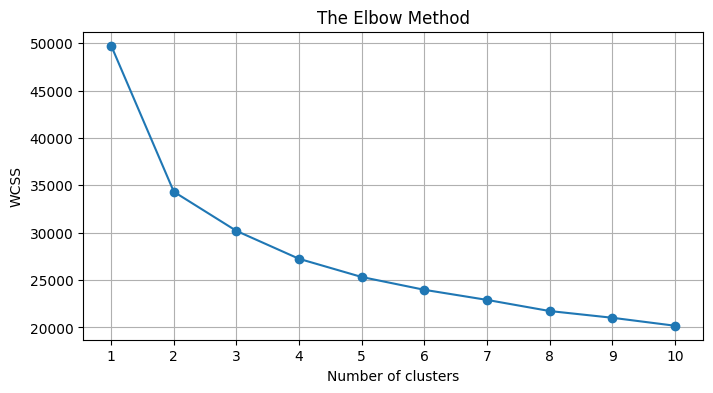

In [460]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++',n_init=10, random_state=42)
    kmeans.fit(data_prepared_df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss,'-o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()  


## Applying the silhouette score

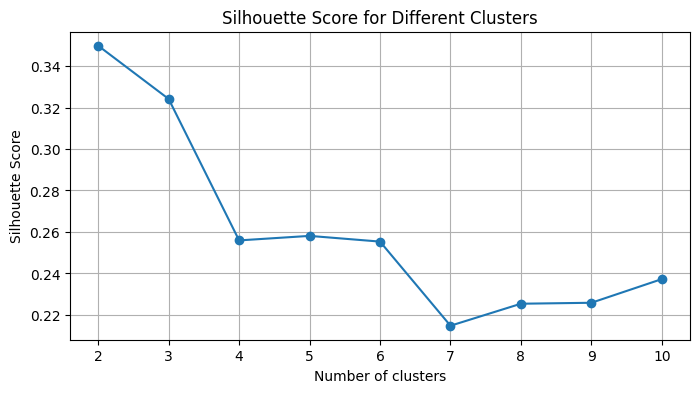

In [461]:
silhouette_scores = []
for k in range(2, 11):  # Silhouette Score is not defined for a single cluster
    kmeans = KMeans(n_clusters=k, init='k-means++',n_init=10, random_state=42)
    cluster_labels=kmeans.fit(data_prepared_df).labels_
    score = silhouette_score(data_prepared_df, cluster_labels)
    silhouette_scores.append(score)

# Plotting the Silhouette Scores
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, '-o')
plt.title('Silhouette Score for Different Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

## Applying k-means

### 3-clusters

In [462]:
# K-Means for 3 clusters
kmeans_3 = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)
clusters_3 = kmeans_3.fit_predict(data_prepared_df)

# Add the cluster labels to your dataframe
df['Cluster_3'] = clusters_3


In [463]:
# Analyze the clusters for 3-cluster solution
cluster_analysis_3 = df.groupby('Cluster_3').mean()

C:/Users/USCS/AppData/Local/Temp/xpython_15532/2302116446.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_analysis_3 = df.groupby('Cluster_3').mean()


In [464]:
cluster_analysis_3.sort_values(by='TotalSpending', ascending=False)

,Age,Income,NumberOfKidsAtHome,NumberOfTeensAtHome,TotalNumberOfChildren,AmountSpentOnWines,AmountSpentOnFruits,AmountSpentOnMeat,AmountSpentOnFish,AmountSpentOnSweets,AmountSpentOnGold,TotalSpending,NumberOfDealsPurchases,NumberOfWebPurchases,NumberOfCatalogPurchases,NumberOfStorePurchases,TotalNumberOfPurchases,NumberOfWebVisitsPerMonth,AcceptedCampaign1,AcceptedCampaign2,AcceptedCampaign3,AcceptedCampaign4,AcceptedCampaign5,AcceptedLastCampaign,TotalAcceptedCampaigns
Cluster_3,,,,,,,,,,,,,,,,,,,,,,,,,
0,45.742331,78419.527607,0.055215,0.196319,0.251534,897.815951,49.159509,424.797546,76.092025,45.865031,75.533742,1569.263804,1.276074,5.490798,5.938650,8.263804,20.969325,3.453988,0.484663,0.159509,0.147239,0.460123,0.742331,0.595092,2.588957
2,47.731507,65137.546575,0.138356,0.590411,0.728767,514.690411,46.791781,269.412329,64.804110,39.386301,71.590411,1006.675342,2.675342,5.997260,4.512329,8.557534,21.742466,4.342466,0.041096,0.000000,0.064384,0.069863,0.006849,0.117808,0.300000
1,43.568238,36213.924731,0.723739,0.530190,1.253929,72.081059,5.514475,29.825476,8.139785,5.428453,19.099256,140.088503,2.333333,2.598842,0.725393,3.590571,9.248139,6.444169,0.004136,0.001654,0.067825,0.025641,0.000000,0.095120,0.194376


In [473]:
df[df['Cluster_3']==1]

,Age,Education,Marital_Status,Income,NumberOfKidsAtHome,NumberOfTeensAtHome,TotalNumberOfChildren,AmountSpentOnWines,AmountSpentOnFruits,AmountSpentOnMeat,AmountSpentOnFish,AmountSpentOnSweets,AmountSpentOnGold,TotalSpending,NumberOfDealsPurchases,NumberOfWebPurchases,NumberOfCatalogPurchases,NumberOfStorePurchases,TotalNumberOfPurchases,NumberOfWebVisitsPerMonth,AcceptedCampaign1,AcceptedCampaign2,AcceptedCampaign3,AcceptedCampaign4,AcceptedCampaign5,AcceptedLastCampaign,TotalAcceptedCampaigns,CustomerSegment,Cluster_3
1,60,Graduation,Single,46344,1,1,2,11,1,6,2,1,6,27,2,1,1,2,6,5,0,0,0,0,0,0,0,Low Spending,1
3,30,Graduation,In relationship,26646,1,0,1,11,4,20,10,3,5,53,2,2,0,4,8,6,0,0,0,0,0,0,0,Low Spending,1
7,29,PhD,In relationship,33454,1,0,1,76,10,56,3,1,23,169,2,4,0,4,10,8,0,0,0,0,0,0,0,Low Spending,1
8,40,PhD,In relationship,30351,1,0,1,14,0,24,3,3,2,46,1,3,0,2,6,9,0,0,0,0,0,1,1,Low Spending,1
9,64,PhD,In relationship,5648,1,1,2,28,0,6,1,1,13,49,1,1,0,0,2,20,0,0,1,0,0,0,1,Low Spending,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2230,30,Graduation,Single,11012,1,0,1,24,3,26,7,1,23,84,3,3,1,2,9,9,0,0,1,0,0,0,1,Low Spending,1
2232,28,Graduation,Single,26816,0,0,0,5,1,6,3,4,3,22,1,0,0,3,4,4,0,0,0,0,0,0,0,Low Spending,1
2234,40,Graduation,In relationship,34421,1,0,1,3,3,7,6,2,9,30,1,1,0,2,4,7,0,0,0,0,0,0,0,Low Spending,1
2236,68,PhD,In relationship,64014,2,1,3,406,0,30,0,0,8,444,7,8,2,5,22,7,1,0,0,0,0,0,1,Medium Spending,1
